<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo_16/blob/main/ActividadSemanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Semana 4 - Actividad 1**

###Maestría en Inteligencia Artificial Aplicada
###Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)

###Tecnológico de Monterrey

###Prof: Jobish Vallikavungal Devassia

###**Mateo Cruz Lanchero - Matricula A01793882**
###**Johan Andrés Castro**

11 de octubre del 2022

## Parte 1

Preprocesamiento de datos.

In [246]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [247]:
# Mostrar todas las filas y columnas

#pd.set_option('display.rows', None)
pd.set_option('display.max_columns', None)

DATASET 

Importamos repo

In [248]:
input_data = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(input_data)
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [249]:
# Nombre de las columnas

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Recodificación de los datos en variables categóricas y numéricas


In [250]:
df['ID'] = df['ID'].astype('category')
df['X1'] = df['X1'].astype('float64')
df['X2'] = df['X2'].astype('category')
df['X3'] = df['X3'].astype('category')
df['X4'] = df['X4'].astype('category')
df['X6'] = df['X6'].astype('category')
df['X7'] = df['X7'].astype('category')
df['X8'] = df['X8'].astype('category')
df['X9'] = df['X9'].astype('category')
df['X10'] = df['X10'].astype('category')
df['X11'] = df['X11'].astype('category')
df['Y'] = df['Y'].astype('category')
df.dtypes

ID     category
X1      float64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

**Limpieza de Datos**

Remoción de todos los registros que tengan valores NaN (Not a Number)

In [251]:
df.dropna(inplace=True)
# Columnas y filas

df.shape

(29958, 25)

1. Determinación del número mínimo de componentes principales que representan la mayor parte de la variación en los datos

Normalización de los Datos
Para PCA sólo se consideran las variables numéricas

In [252]:
# Separación de las variables de entrada 'X' y salida 'y'

X = df.drop(['ID','X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis=1)
y = df['Y']

In [253]:
# Nombre de las columnas de X

X.columns

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [254]:
X.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


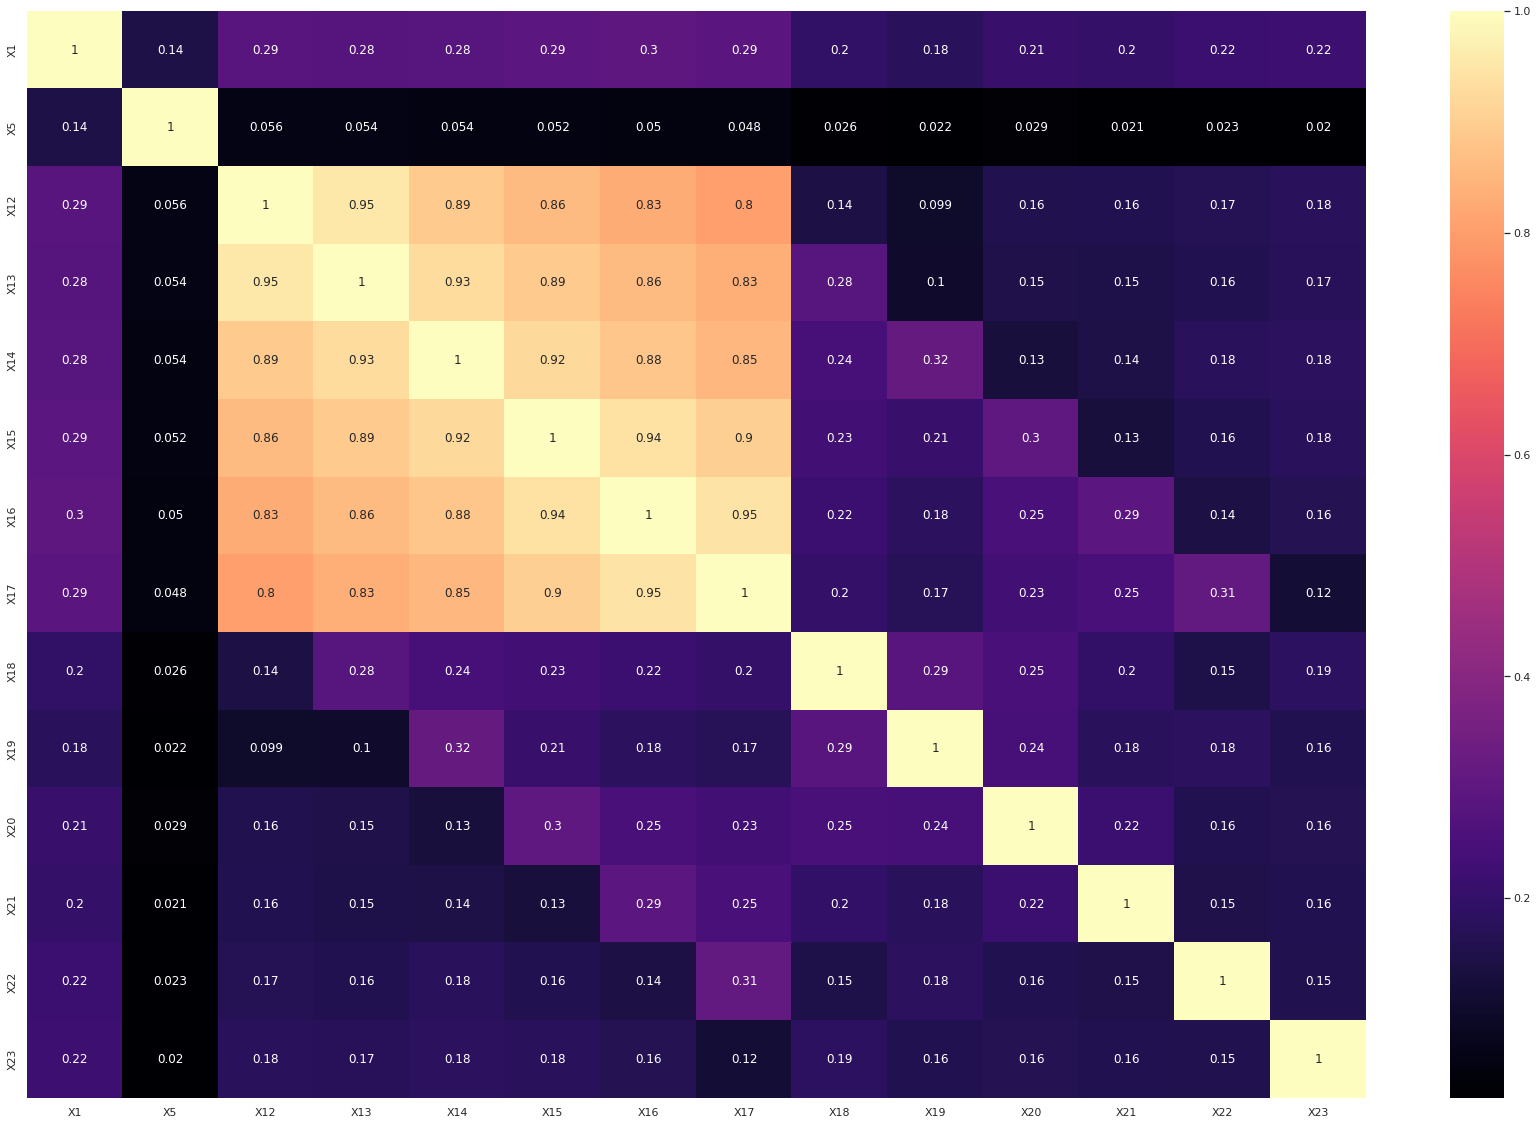

In [275]:
import seaborn as sns

correlation = X.corr()
sns.set(rc = {'figure.figsize': (30,20)})
sns.heatmap(correlation, annot = True, cmap = "magma")

Nuestro próximo paso será la normalización del dataset, antes de proceder con el PCA ya que no queremos llegar a este con algún tipo de sesgo.

In [256]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

scaled_X= pd.DataFrame (scaled, columns=X.columns)
scaled_X

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29954,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29955,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29956,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


Ahora procederemos a analizar la varianza tanto de los datos normalizados como los que traiamos antes de normalizar.

In [257]:
normal_summary = {
    "Variance" :X.var(),
    "Max Value" :X.max(),
    "Min Value" :X.min(),
    "Mean Value": X.mean()
                                  
}
pd.DataFrame(normal_summary).transpose()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Variance,1.683177e+10,84.903672,5.427998e+09,5.071040e+09,4.814312e+09,4.142813e+09,3.699829e+09,3.550120e+09,2.745259e+08,5.315784e+08,3.103706e+08,2.457434e+08,2.336481e+08,3.164479e+08
Max Value,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05
Min Value,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Mean Value,1.675559e+05,35.483443,5.124812e+04,4.920049e+04,4.703239e+04,4.327934e+04,4.032898e+04,3.888993e+04,5.664614e+03,5.925715e+03,5.228430e+03,4.829874e+03,4.801482e+03,5.220708e+03


In [258]:
scaled_summary = {
    "Variance" :scaled_X.var(),
    "Max Value" :scaled_X.max(),
    "Min Value" :scaled_X.min(),
    "Mean Value": scaled_X.mean()
                                  
}
pd.DataFrame(scaled_summary).transpose()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Variance,0.017174,0.025239,0.004250,0.004567,0.001451,0.003676,0.003638,0.002097,0.000360,0.000187,0.000387,0.000637,0.001284,0.001132
Max Value,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min Value,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean Value,0.159147,0.249715,0.191868,0.112913,0.112167,0.200906,0.120637,0.290865,0.006485,0.003518,0.005835,0.007778,0.011257,0.009875


**Creación de modelo de PCA**

In [259]:
# Creación de modelo de PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
pca_columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
pca_t = pca.fit_transform(scaled_X)
pca_data = pd.DataFrame(pca_t, columns=pca_columns)
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.262188,-0.026604,0.028315,-0.001051,0.000751,-0.000306,-0.000105,-0.000632,0.000697,-0.000035,0.000401,0.000401,0.000345,0.000617
1,-0.188392,0.006771,-0.041139,-0.005521,-0.003550,0.002127,-0.002333,-0.003179,-0.000201,-0.000136,-0.000296,0.000744,-0.000278,-0.000091
2,-0.076881,-0.064505,0.016742,-0.001537,0.004293,0.003346,-0.000195,-0.006527,0.003290,-0.000453,0.004963,-0.005169,-0.001223,-0.000417
3,-0.036721,-0.085188,0.081505,-0.005246,0.006530,-0.004475,0.002225,0.000425,-0.002551,0.001193,0.002454,0.005211,0.000912,-0.003400
4,0.231172,-0.306858,0.088291,0.012575,-0.016895,0.012675,0.003335,0.007421,0.003606,0.021072,0.006447,0.005086,-0.001498,0.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.128309,0.094311,0.071854,-0.059023,0.094890,-0.053124,0.014062,0.038276,0.001837,0.038849,-0.016752,0.021375,0.001404,-0.018022
29954,0.067075,-0.139657,-0.029670,-0.006357,-0.008640,0.002279,-0.005702,0.003572,0.006376,0.000316,-0.001637,0.000984,0.001956,-0.000401
29955,-0.064252,-0.129933,0.059972,0.016039,-0.016939,0.014665,-0.002819,0.003631,0.018354,-0.005280,-0.000419,0.004130,0.000897,-0.001470
29956,0.041208,-0.095464,0.068855,0.107779,0.016154,-0.051801,-0.021498,0.087386,-0.055150,-0.020578,-0.017084,-0.012846,-0.007858,-0.009933


**Determinación de los componentes iniciales**

Porcentaje de varianza por componente

In [260]:
# Por porcentaje de varianza por componente del modelo de PCA

per_var = np.round(pca.explained_variance_ratio_*100, decimals=4)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels, per_var)))

PC1 : % 41.4079
PC2 : % 31.9508
PC3 : % 18.2693
PC4 : % 2.0501
PC5 : % 1.7219
PC6 : % 1.5453
PC7 : % 0.9319
PC8 : % 0.6674
PC9 : % 0.5331
PC10 : % 0.3692
PC11 : % 0.218
PC12 : % 0.1649
PC13 : % 0.1125
PC14 : % 0.0576


Sumario de PCA

In [261]:
Explained_var = pca.explained_variance_ratio_*100
Acumulated_var = np.cumsum(pca.explained_variance_ratio_)*100

summary_pca_df = pd.DataFrame({'Standard_Deviation': np.sqrt(pca.explained_variance_),
                               'Proportion_of_Variance': Explained_var,
                               'Acum_Variance' : Acumulated_var
                              })
summary_pca_df.index=pca_columns
summary_pca_df

,Standard_Deviation,Proportion_of_Variance,Acum_Variance
PC1,0.165414,41.407923,41.407923
PC2,0.145302,31.950782,73.358705
PC3,0.109873,18.269254,91.627959
PC4,0.036806,2.050059,93.678019
PC5,0.033732,1.721932,95.399950
PC6,0.031955,1.545291,96.945241
PC7,0.024815,0.931873,97.877114
PC8,0.021001,0.667447,98.544561
PC9,0.018769,0.533105,99.077666
PC10,0.015620,0.369225,99.446890


**Scree Plot**

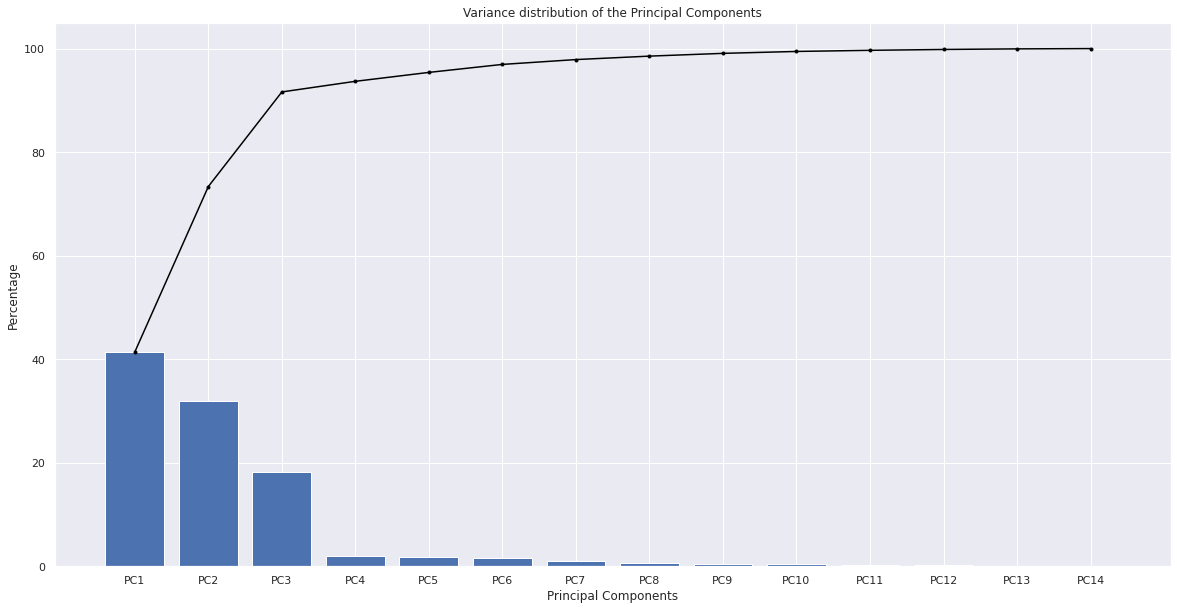

In [262]:
Explained_var=  np.round(pca.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pca.explained_variance_ratio_)*100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(pca_columns,Explained_var)
plt.plot(pca_columns,Acumulated_var, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of the Principal Components")
plt.show()

In [263]:
df_pca_variance= pd.DataFrame()
df_pca_variance['Var_Explained']=Explained_var
df_pca_variance['Acum_var']=Acumulated_var
df_pca_variance.index=pca_columns
df_pca_variance

,Var_Explained,Acum_var
PC1,41.41,41.407923
PC2,31.95,73.358705
PC3,18.27,91.627959
PC4,2.05,93.678019
PC5,1.72,95.399950
PC6,1.55,96.945241
PC7,0.93,97.877114
PC8,0.67,98.544561
PC9,0.53,99.077666
PC10,0.37,99.446890


**CONCLUSIÓN**

Podemos observar que los componentes del PC1 al PC5 son los que más contribuyen con un 95.40 % de la varianza total asociada con las variables originales. De igual forma podemos identificar que el resto de componentes (PC6 AL PC14) no resultan estadisticamente significantes por lo que pueden ser eliminados.

**2. Interpretación de cada componente principal en términos de las variables originales**

Dataframe para examinar la magnitud y dirección de los coeficientes de las variables originales

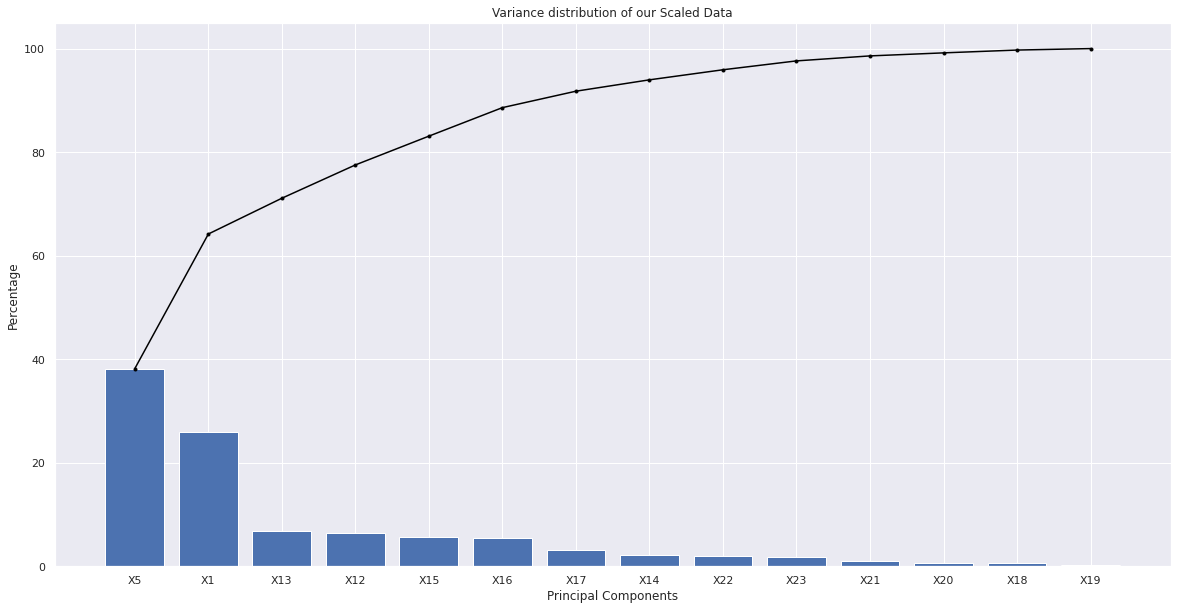

In [264]:
total_var =scaled_X.var().sum()

Explained_var_scaled=   (scaled_X.var()/ total_var)*100
df_scaled_variance= pd.DataFrame(Explained_var_scaled, columns=['Explained_var'])

df_scaled_variance.sort_values(by=['Explained_var'], ascending=False, inplace=True)

df_scaled_variance['Acumulated_var']= df_scaled_variance['Explained_var'].cumsum()



fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(df_scaled_variance.index,df_scaled_variance['Explained_var'])
plt.plot(df_scaled_variance.index,df_scaled_variance['Acumulated_var'], color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of our Scaled Data")
plt.show()

In [265]:
df_scaled_variance

,Explained_var,Acumulated_var
X5,38.195035,38.195035
X1,25.989370,64.184405
X13,6.911827,71.096233
X12,6.432048,77.528281
X15,5.563157,83.091438
X16,5.505059,88.596497
X17,3.172829,91.769326
X14,2.196253,93.965579
X22,1.943576,95.909156
X23,1.713468,97.622623


De esta forma podemos concluir que para alcanzar un 95.40% de la varianza de nuestros datos nos debemos remitir hasta la novena variable, desde X5 hasta X22. Lo cual difiere en gran medida con la forma como con los PCA podemos explicar el mismo porcentaje de varianza solo con los 5 primeros componentes.

En la siguiente función obtenemos las columnas de máxima varianza para los componentes de PC1 a PC5.

Ahora podemos determinar el peso que cada variable tiene por componente. Entre mayor sea el numero obtenido mayor peso tendrá sobre la variable.

In [266]:
df_components = pd.DataFrame(
pca.components_.round(4), 
columns = pca_columns, 
index = scaled_X.columns)
df_components=df_components.abs()
df_components.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X1,0.4379,0.8236,0.1654,0.1721,0.0965
X5,0.4993,0.5562,0.3023,0.3179,0.1781
X12,0.7424,0.1111,0.3059,0.3304,0.1810
X13,0.0777,0.0055,0.1932,0.1766,0.0214
X14,0.0222,0.0006,0.4243,0.3289,0.0410
X15,0.0257,0.0028,0.2293,0.1609,0.0117
X16,0.0151,0.0001,0.2315,0.1061,0.1062
X17,0.0153,0.0004,0.2044,0.2762,0.1047
X18,0.0107,0.0004,0.3657,0.2250,0.2465
X19,0.0044,0.0002,0.0884,0.2713,0.5335


In [267]:
result_var=df_components.iloc[:,:5].idxmax(axis=0) 
result_var=pd.DataFrame(result_var, columns=['Most_Important_Var'])
result_var

,Most_Important_Var
PC1,X12
PC2,X1
PC3,X14
PC4,X21
PC5,X23


Así podemos identificar cuales variables son las que influyen más en los PCA's escogidos.

In [268]:
# Principal variable por componente

for i in range(1,6):
    largest_var = df_components['PC' + str(i)].idxmax()
    
    print(f'Para componente PC{i} la columna de mayor varianza es la {largest_var} ')

Para componente PC1 la columna de mayor varianza es la X12 
Para componente PC2 la columna de mayor varianza es la X1 
Para componente PC3 la columna de mayor varianza es la X14 
Para componente PC4 la columna de mayor varianza es la X21 
Para componente PC5 la columna de mayor varianza es la X23 


In [269]:
df_components = pd.DataFrame(
pca.components_.round(4), 
columns = pca_columns, 
index = scaled_X.columns)
df_components.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X1,0.4379,0.8236,0.1654,0.1721,0.0965
X5,0.4993,-0.5562,0.3023,0.3179,0.1781
X12,-0.7424,0.1111,0.3059,0.3304,0.1810
X13,-0.0777,0.0055,-0.1932,-0.1766,-0.0214
X14,-0.0222,-0.0006,0.4243,0.3289,0.0410
X15,-0.0257,0.0028,-0.2293,-0.1609,-0.0117
X16,-0.0151,0.0001,0.2315,0.1061,-0.1062
X17,-0.0153,-0.0004,-0.2044,0.2762,0.1047
X18,-0.0107,-0.0004,0.3657,-0.2250,-0.2465
X19,-0.0044,-0.0002,0.0884,-0.2713,0.5335


La dirección de la magnitud es determinada ya sea positiva o negativamente.

Luego de analizar este ejercicio pudimos identificar las variables que tienen un mayor impacto en nuestros componentes principales negativa o positivamente.

**3. Identificación de Valores Atípicos**

A continuación se muestra una gráfica de Box Plot para identificar los valores atípicos

[Text(0, 0.5, 'Valores'), Text(0.5, 0, 'Variables')]

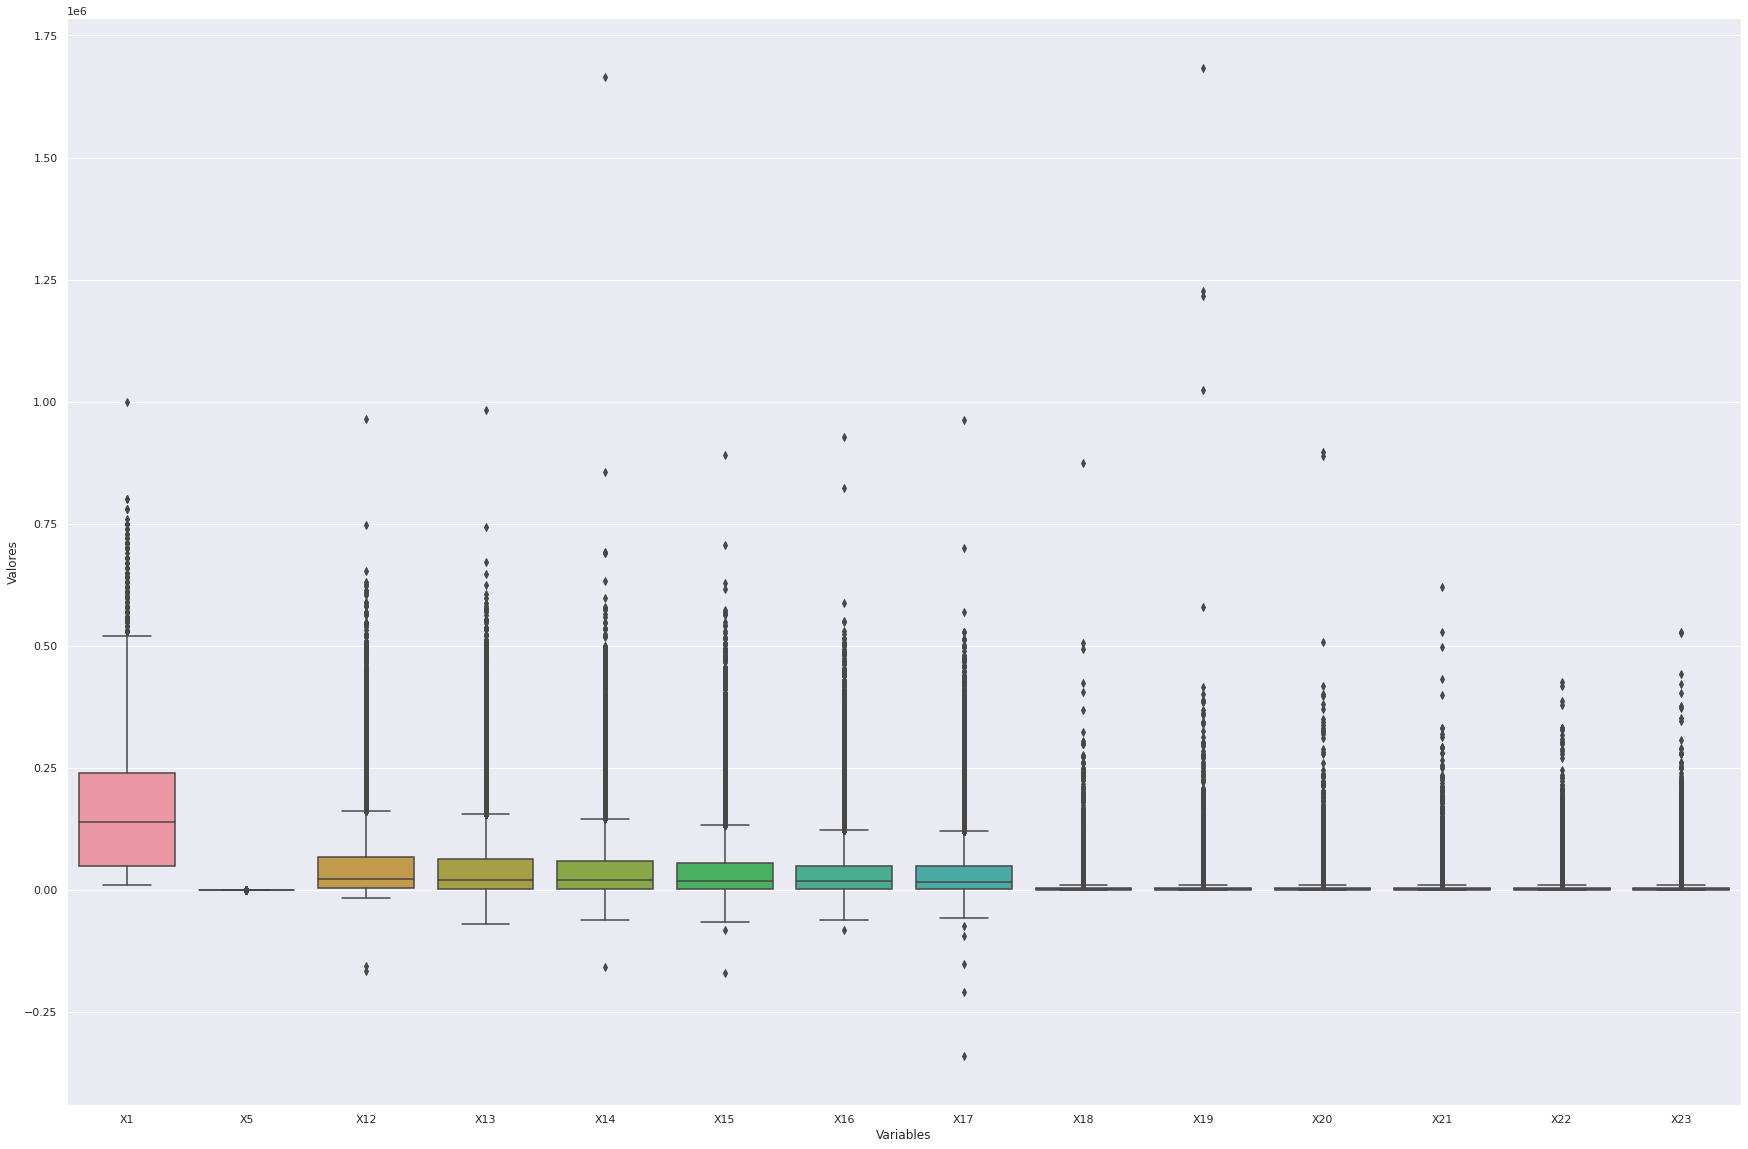

In [270]:
ax = sns.boxplot(data=X)
ax.set(xlabel='Variables', ylabel='Valores')

[Text(0, 0.5, 'Valores'), Text(0.5, 0, 'Variables')]

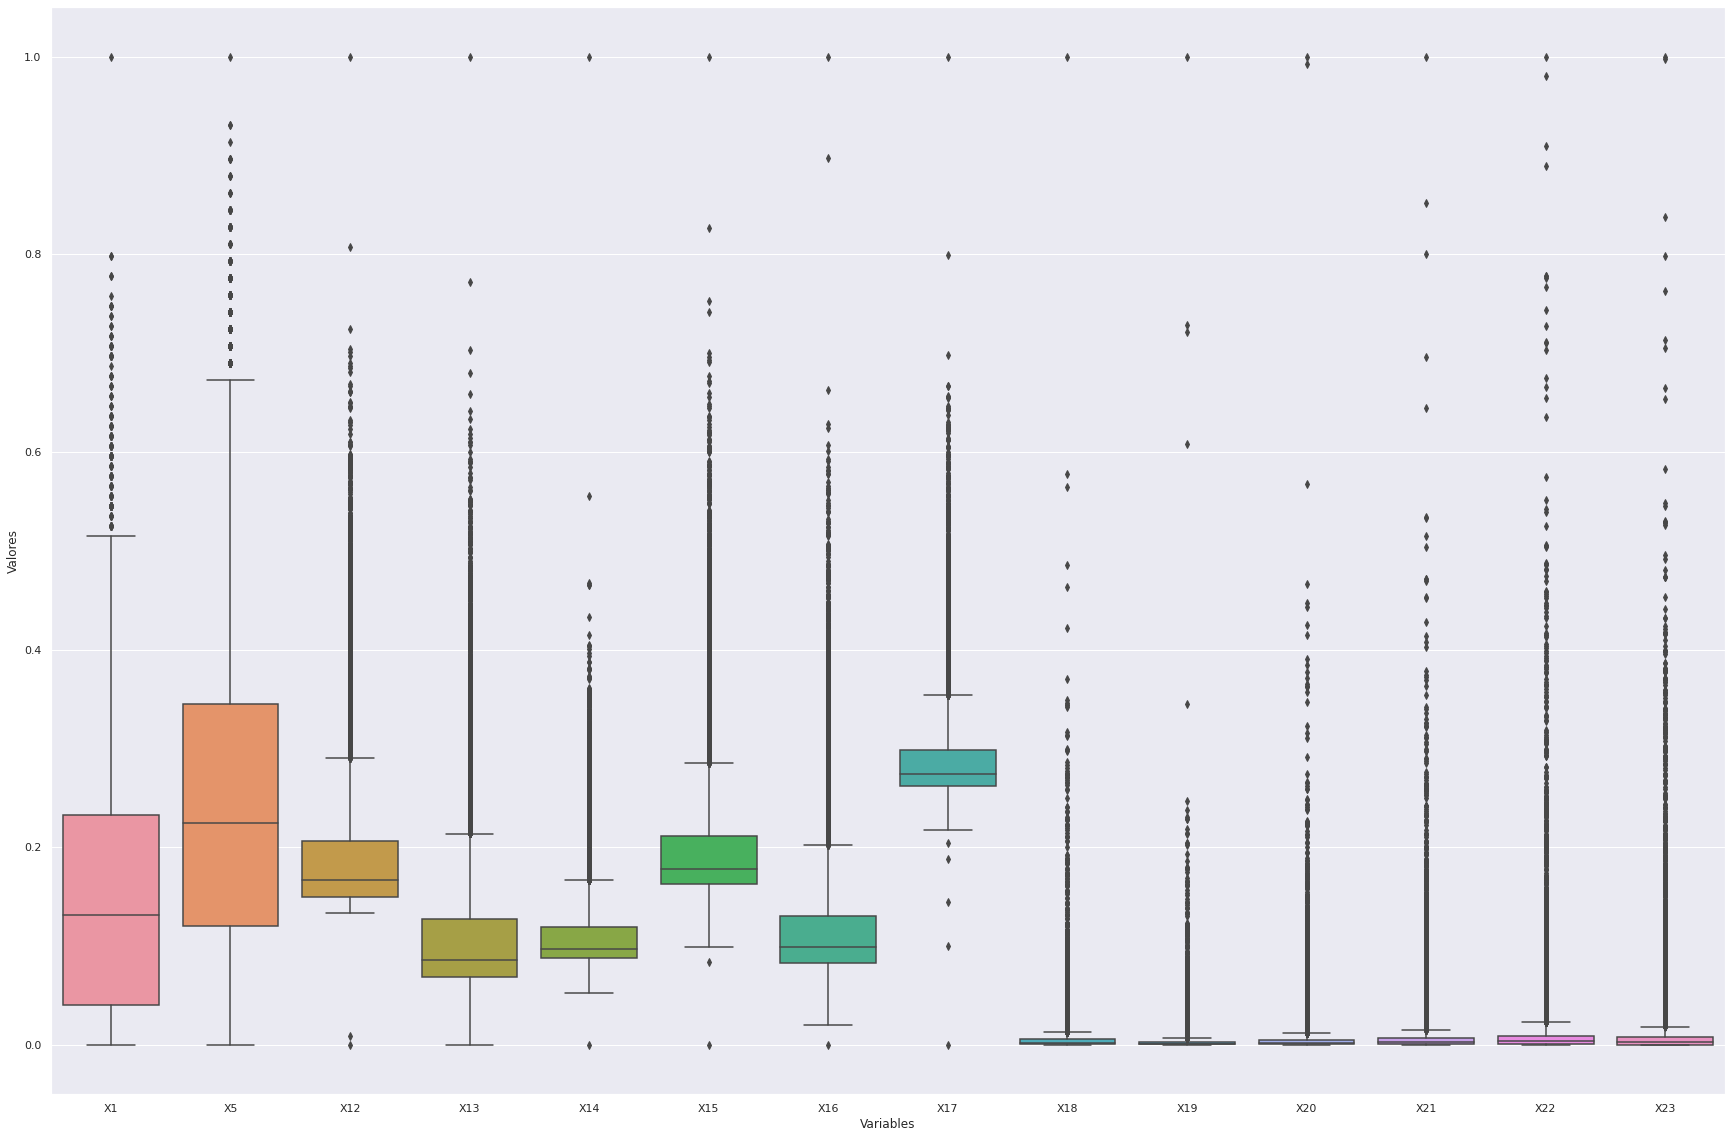

In [271]:
ax = sns.boxplot(data=scaled_X)
ax.set(xlabel='Variables', ylabel='Valores')

Visualización de Box Plot por variable

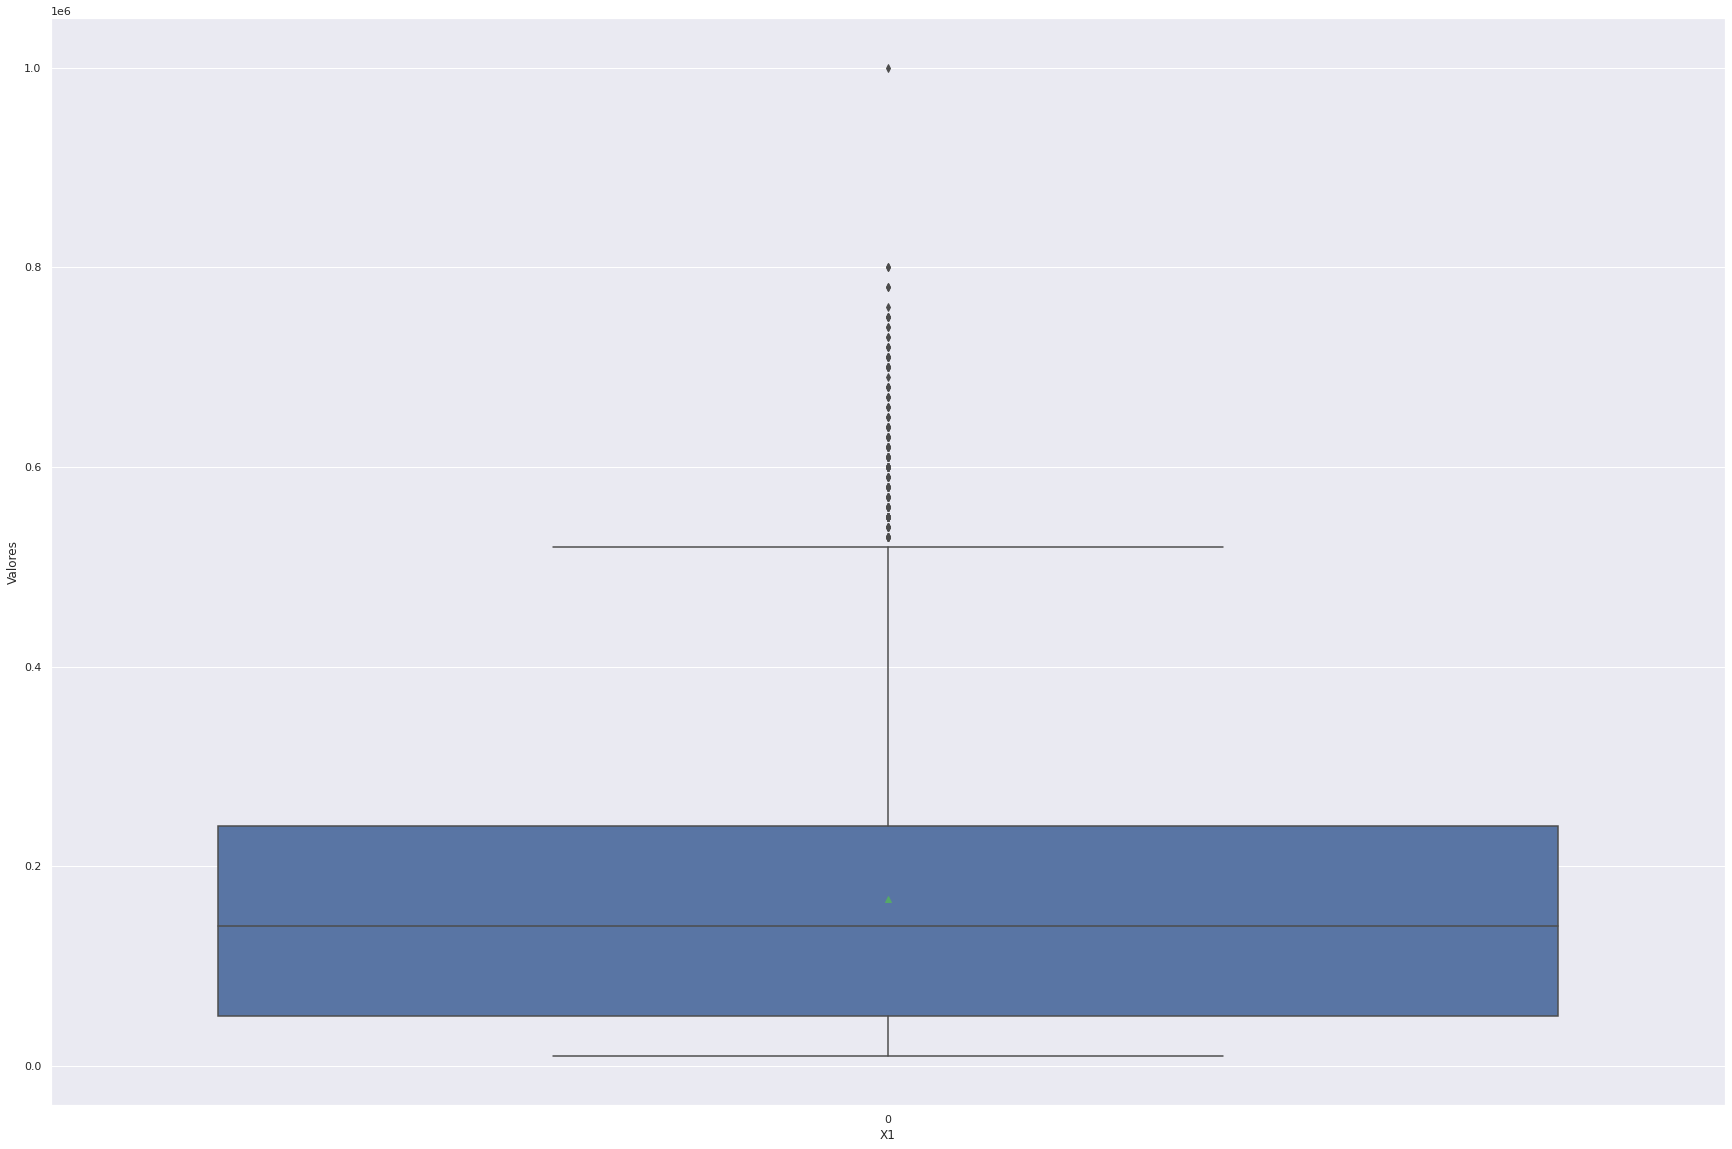

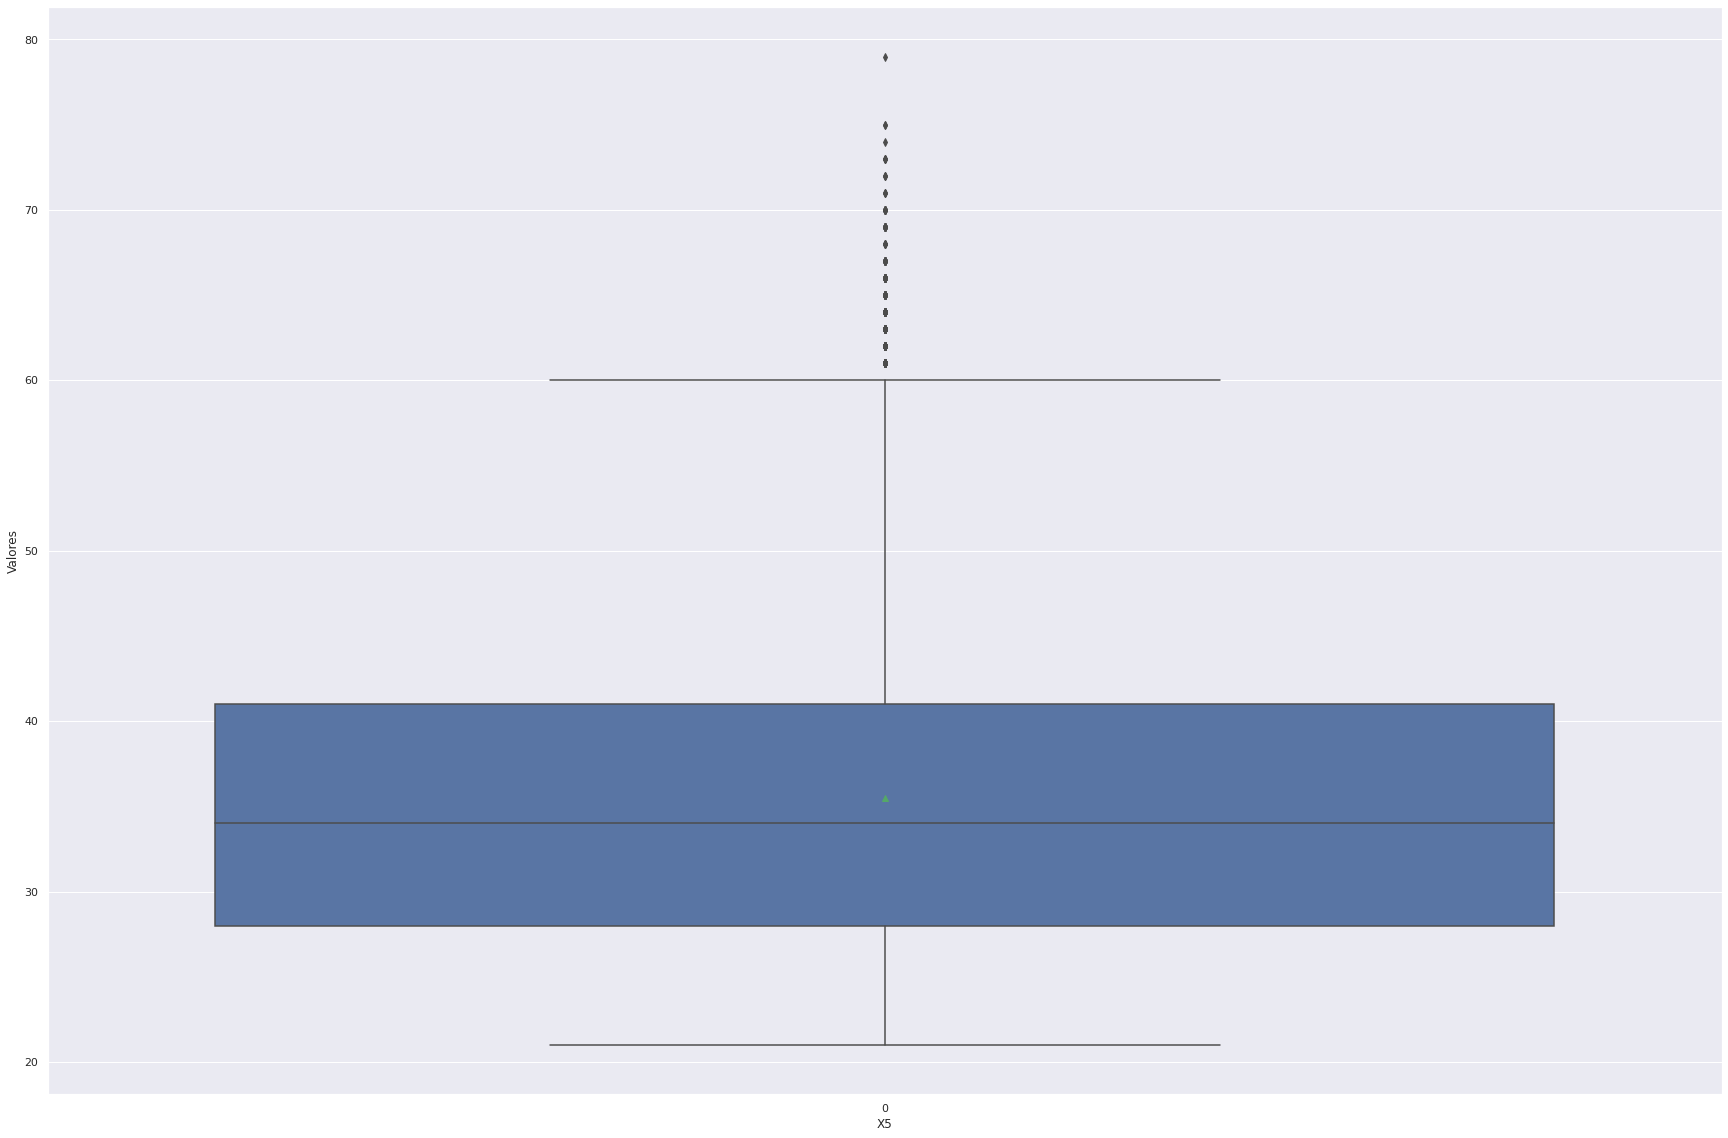

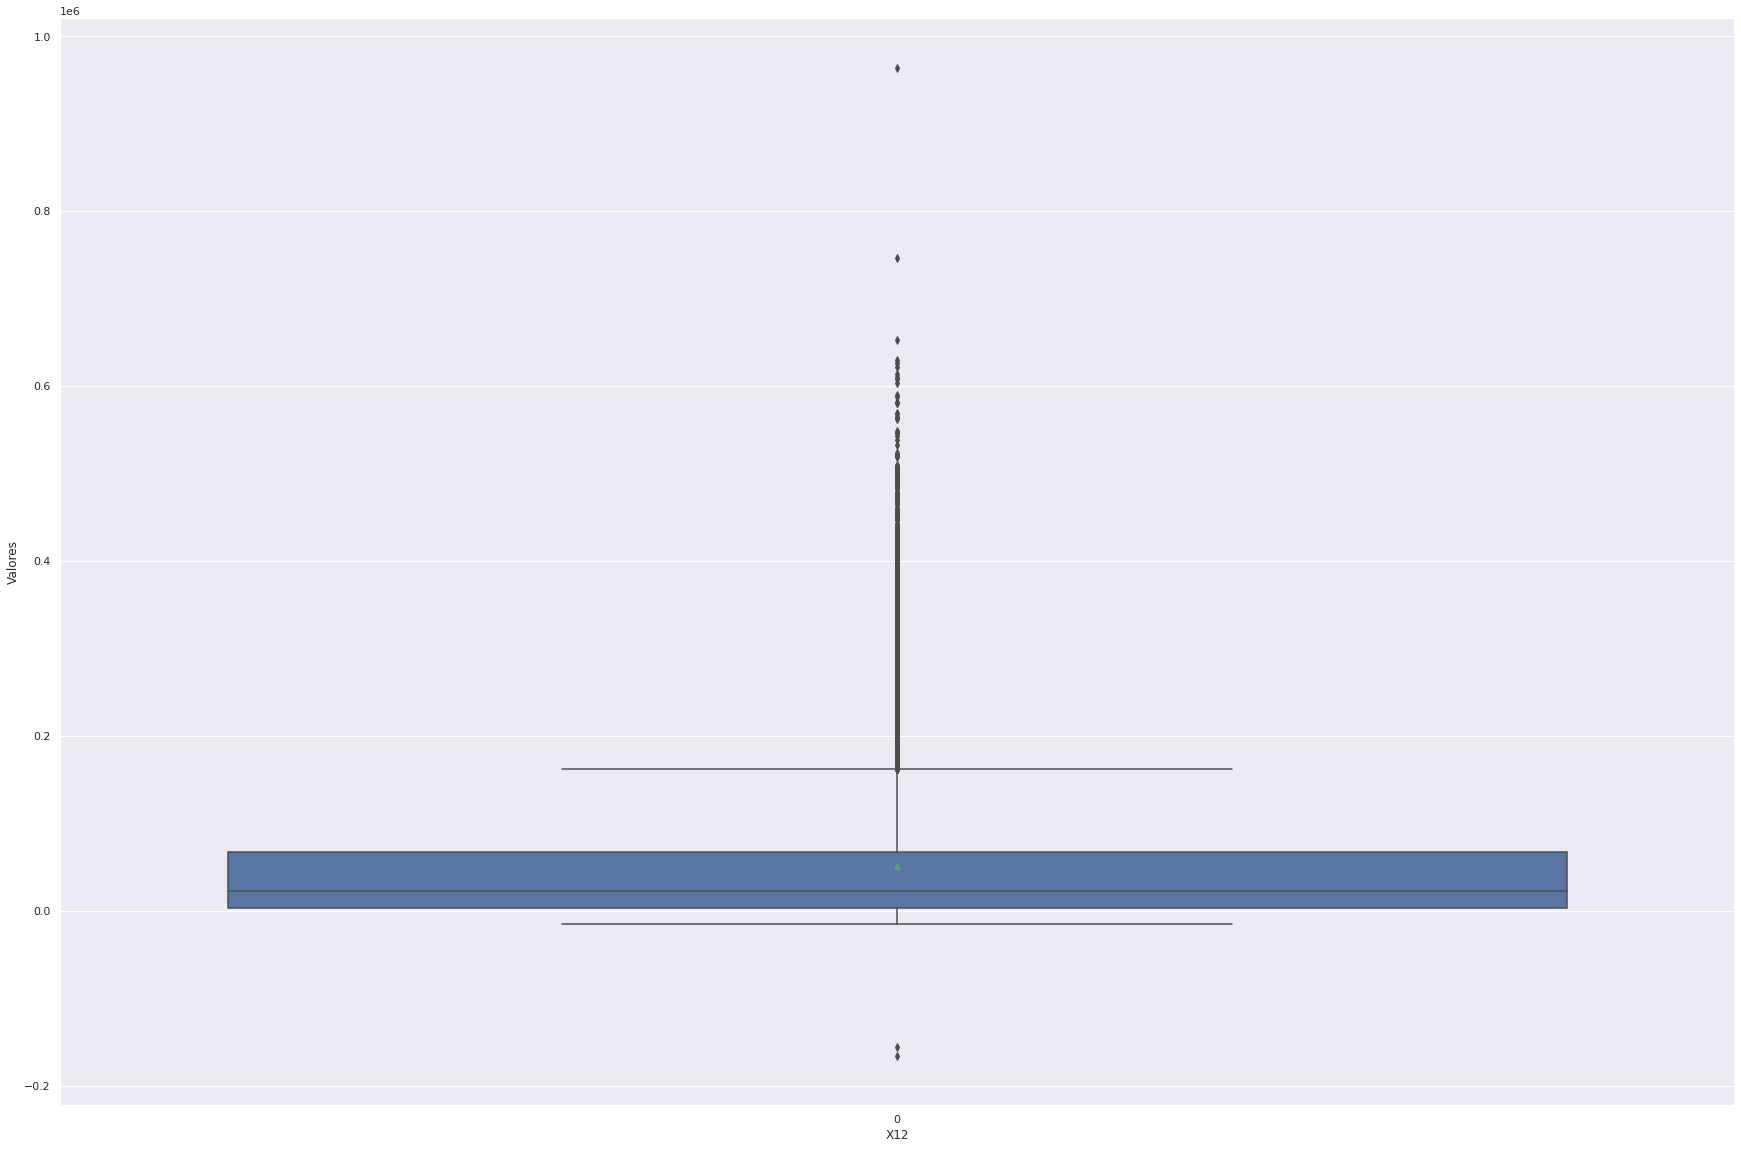

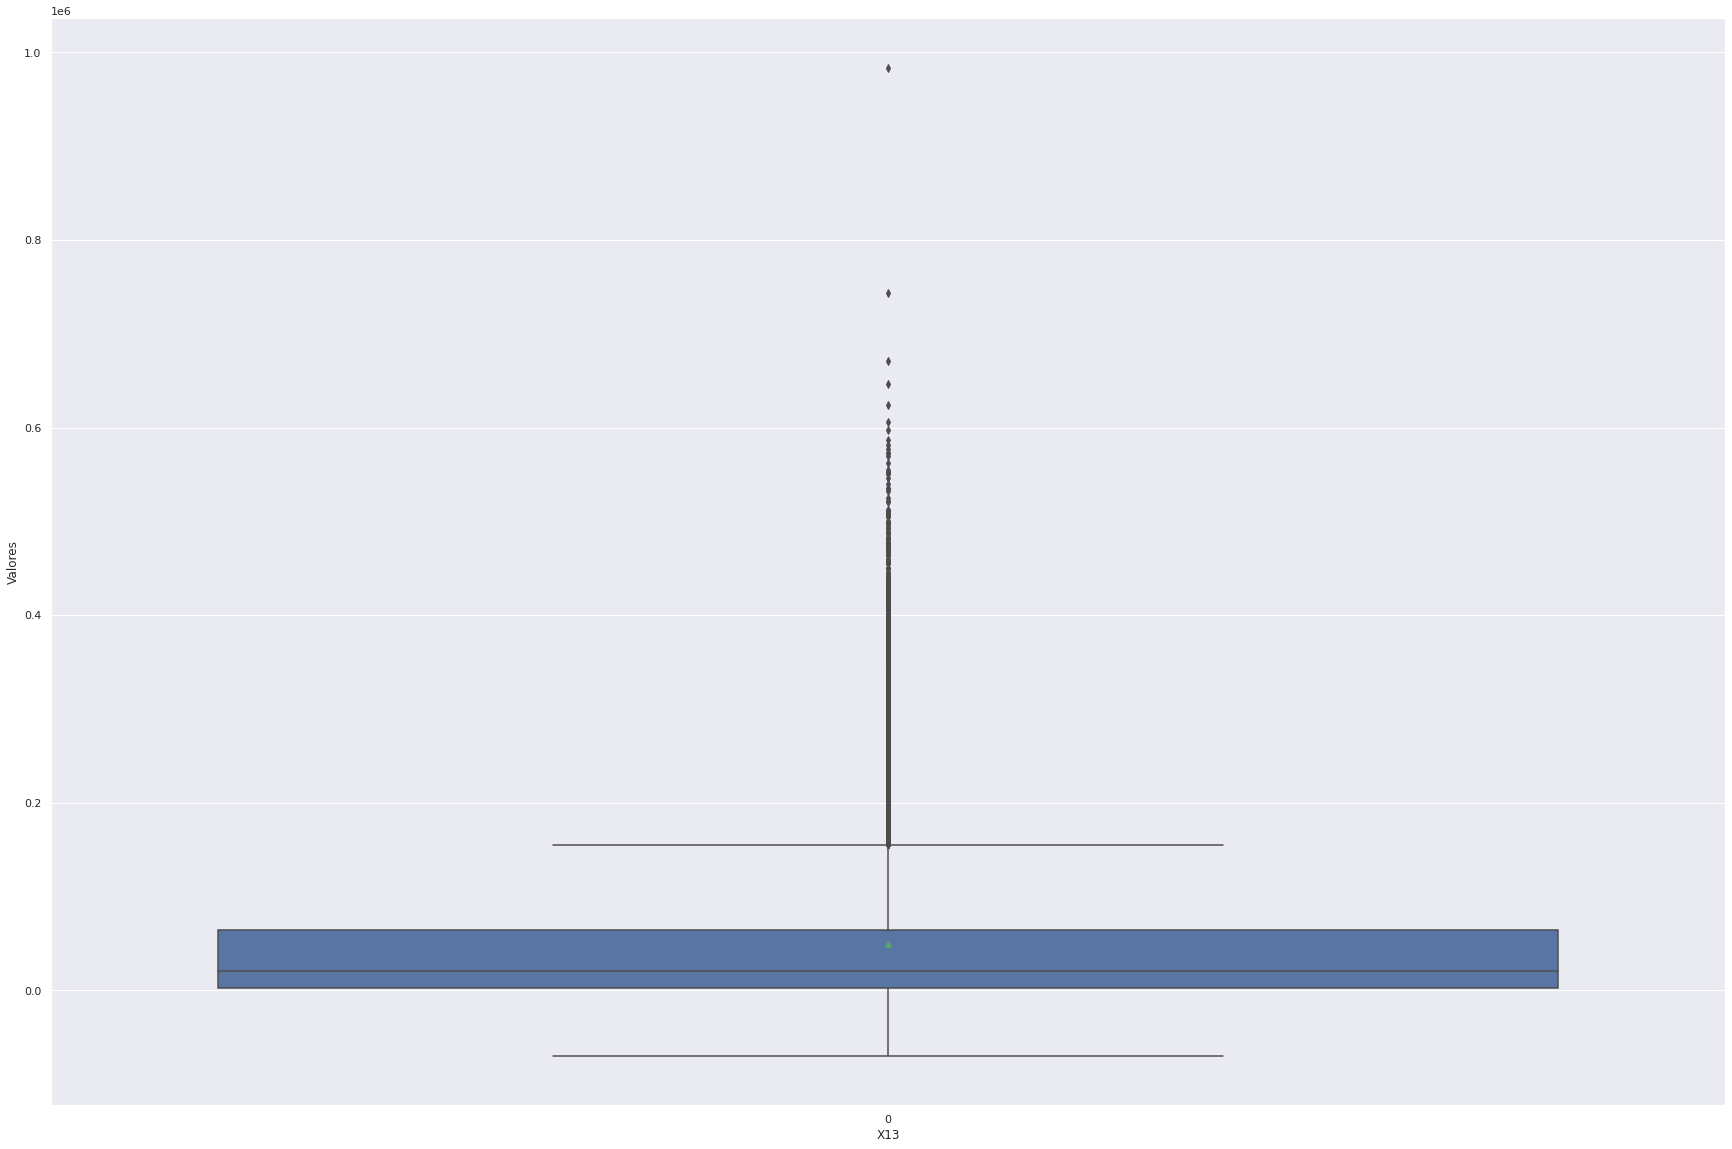

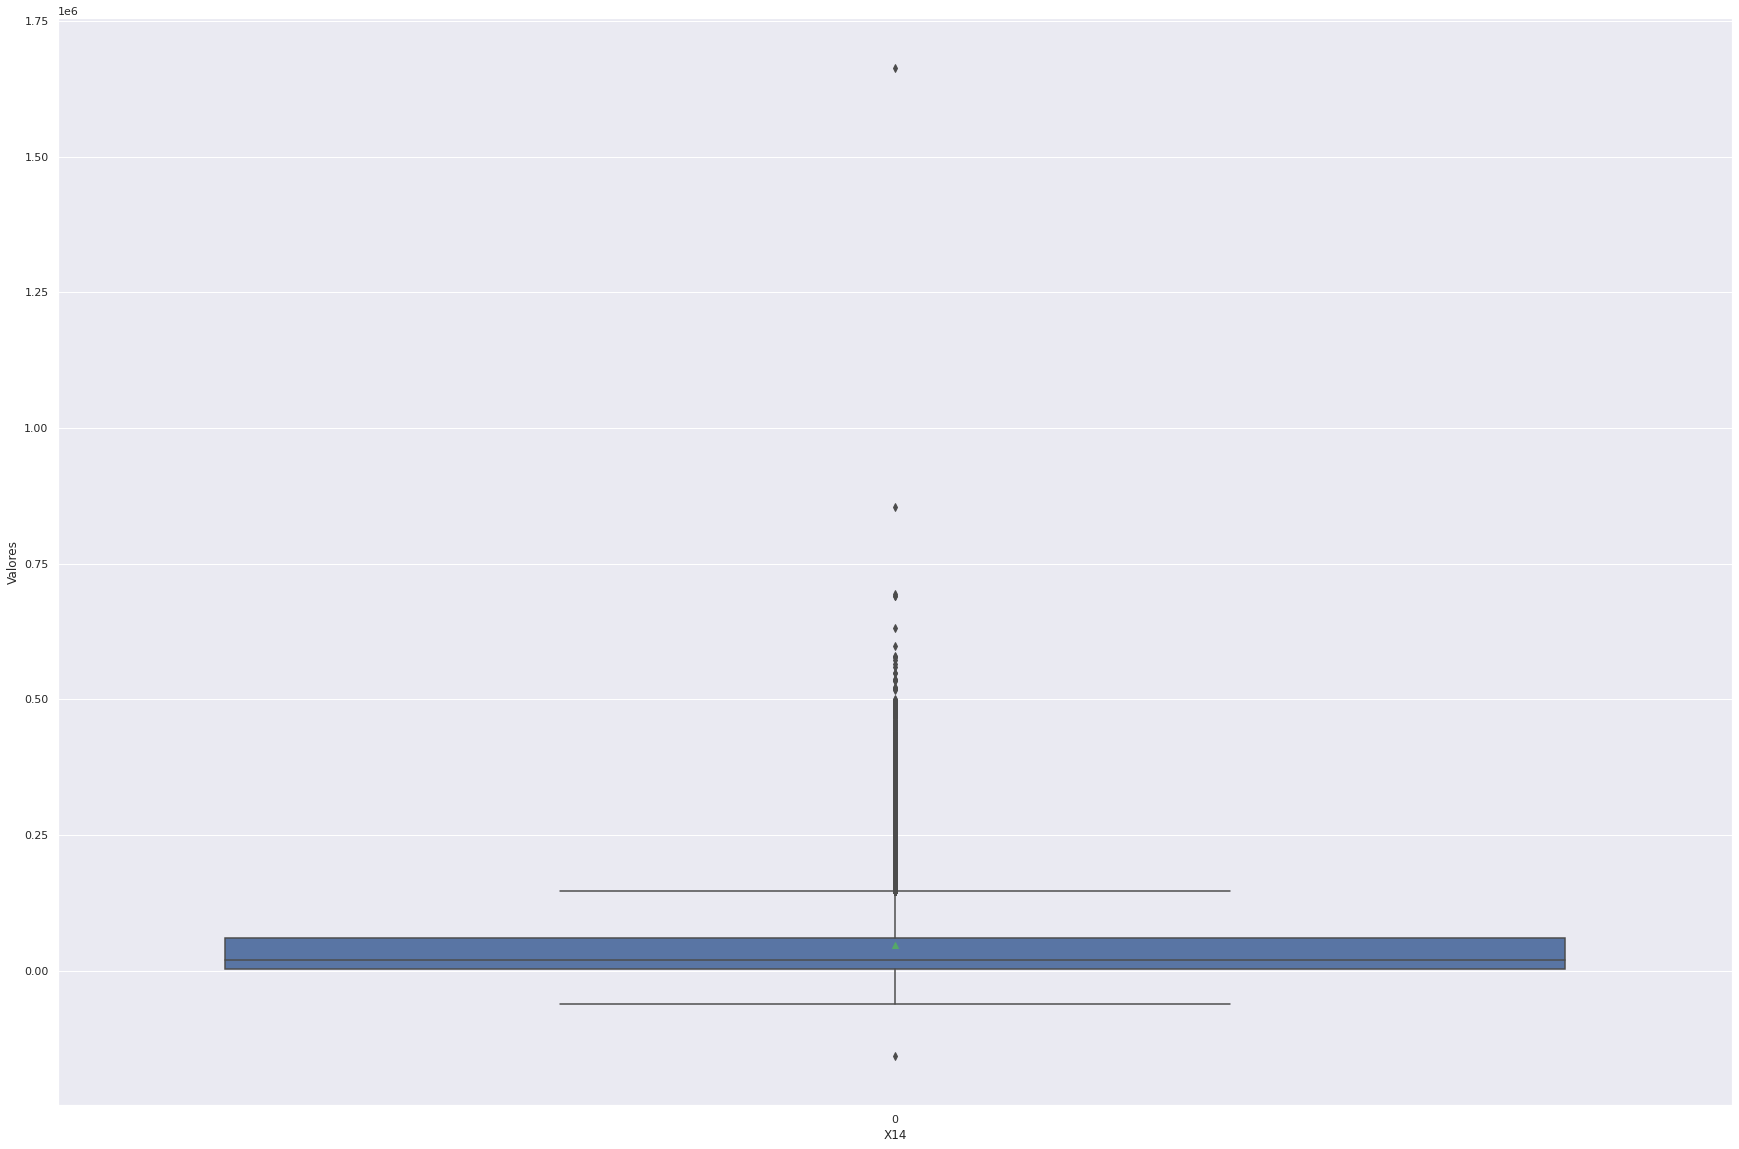

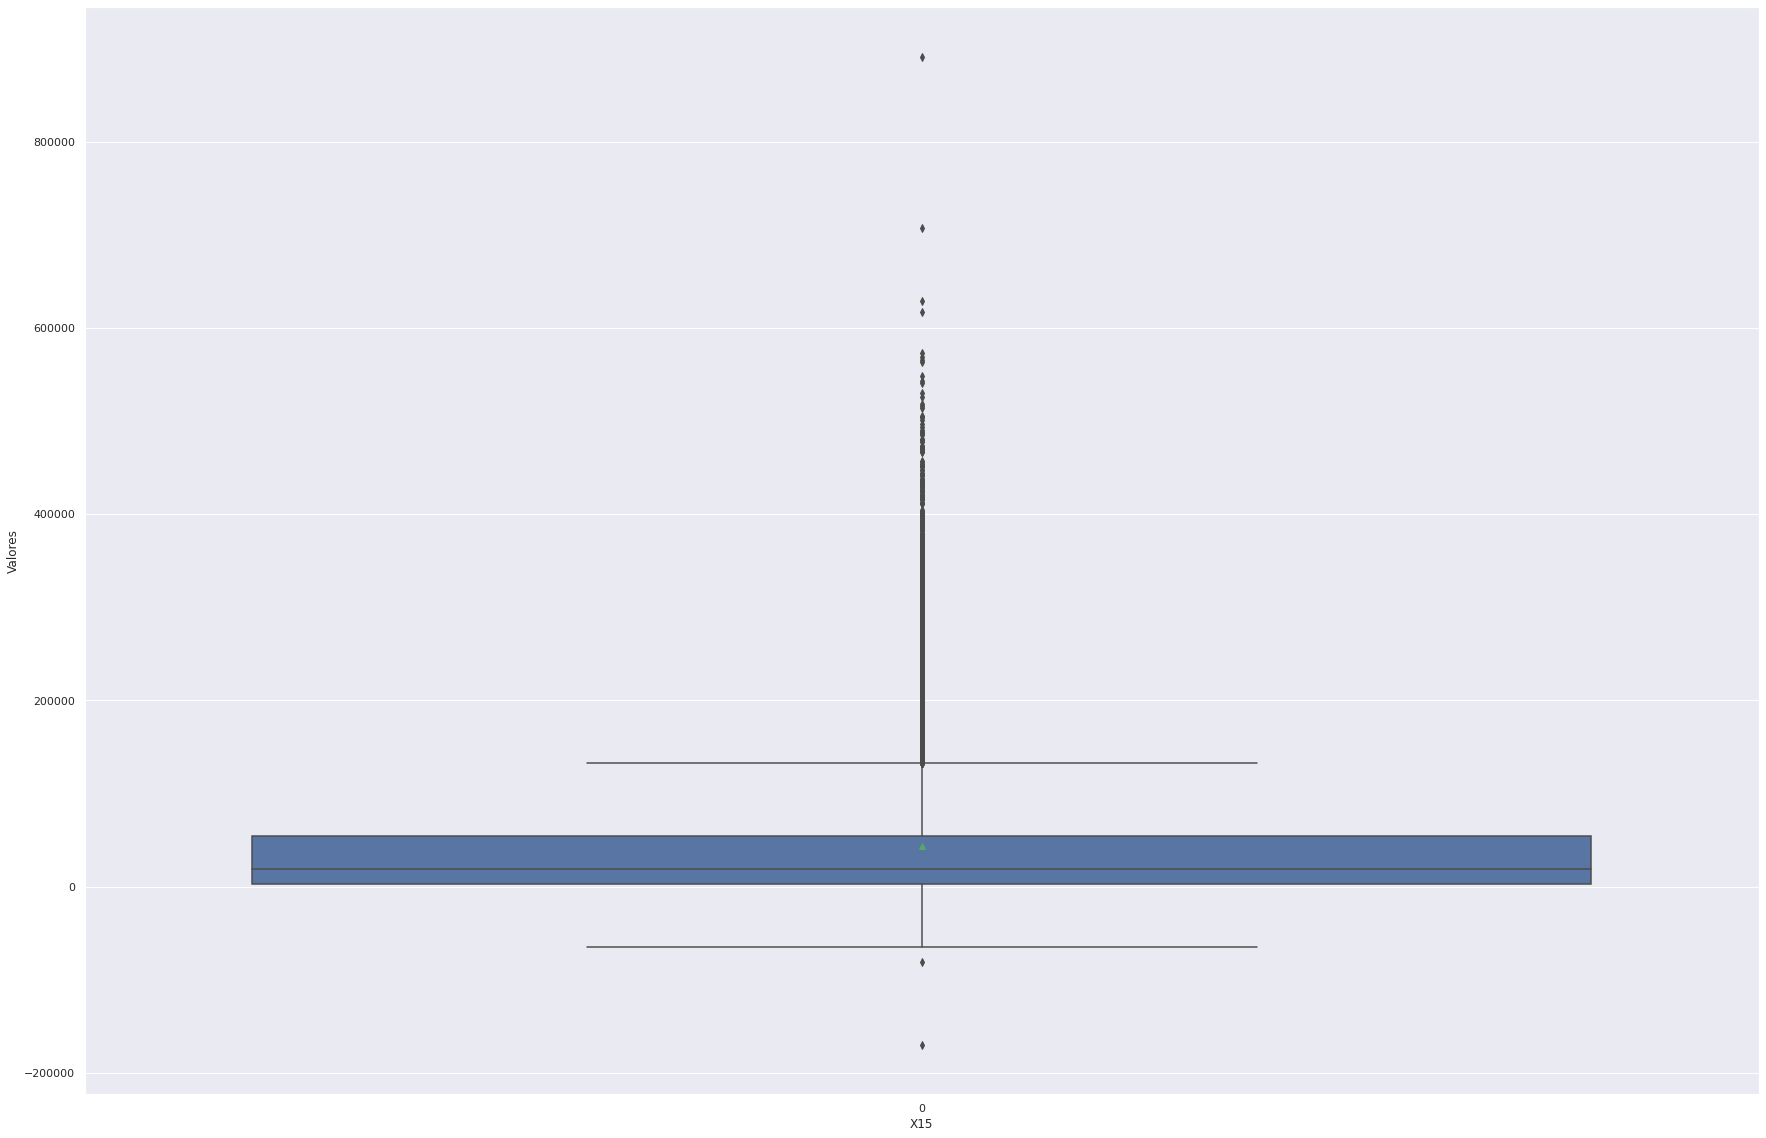

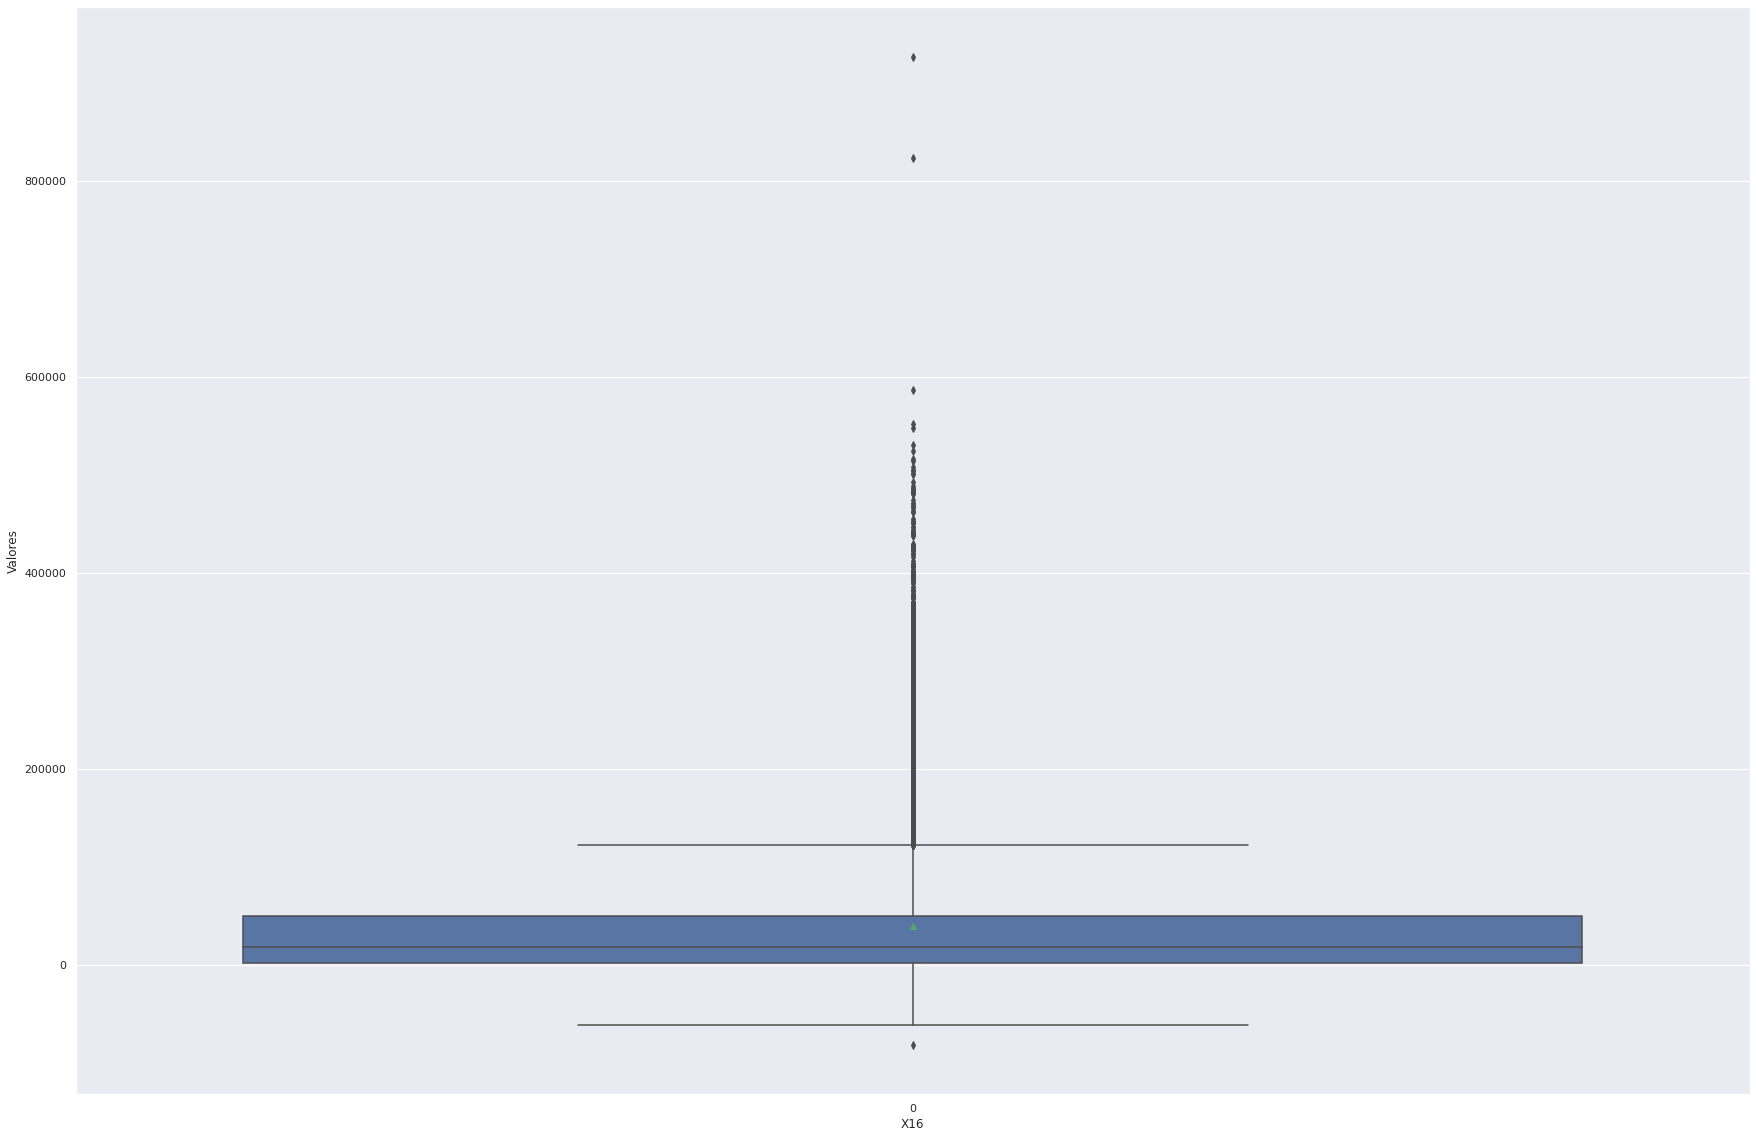

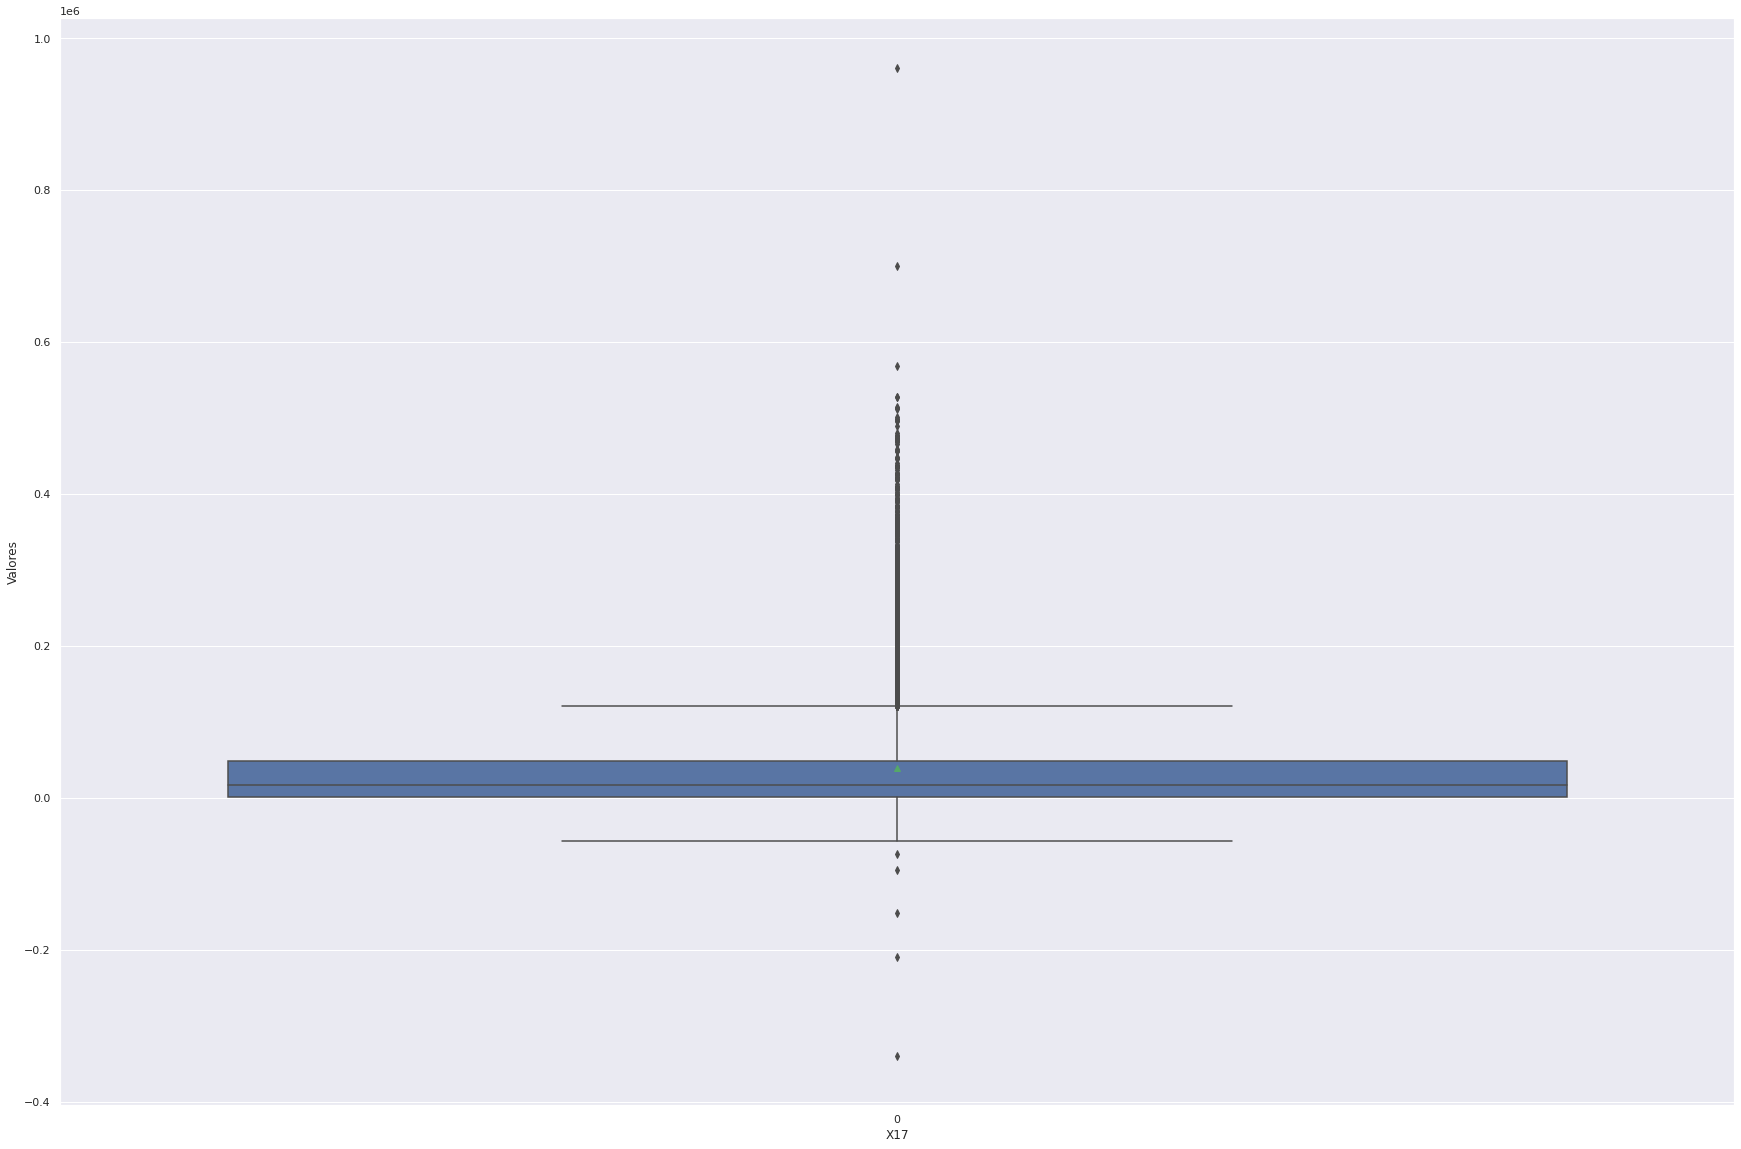

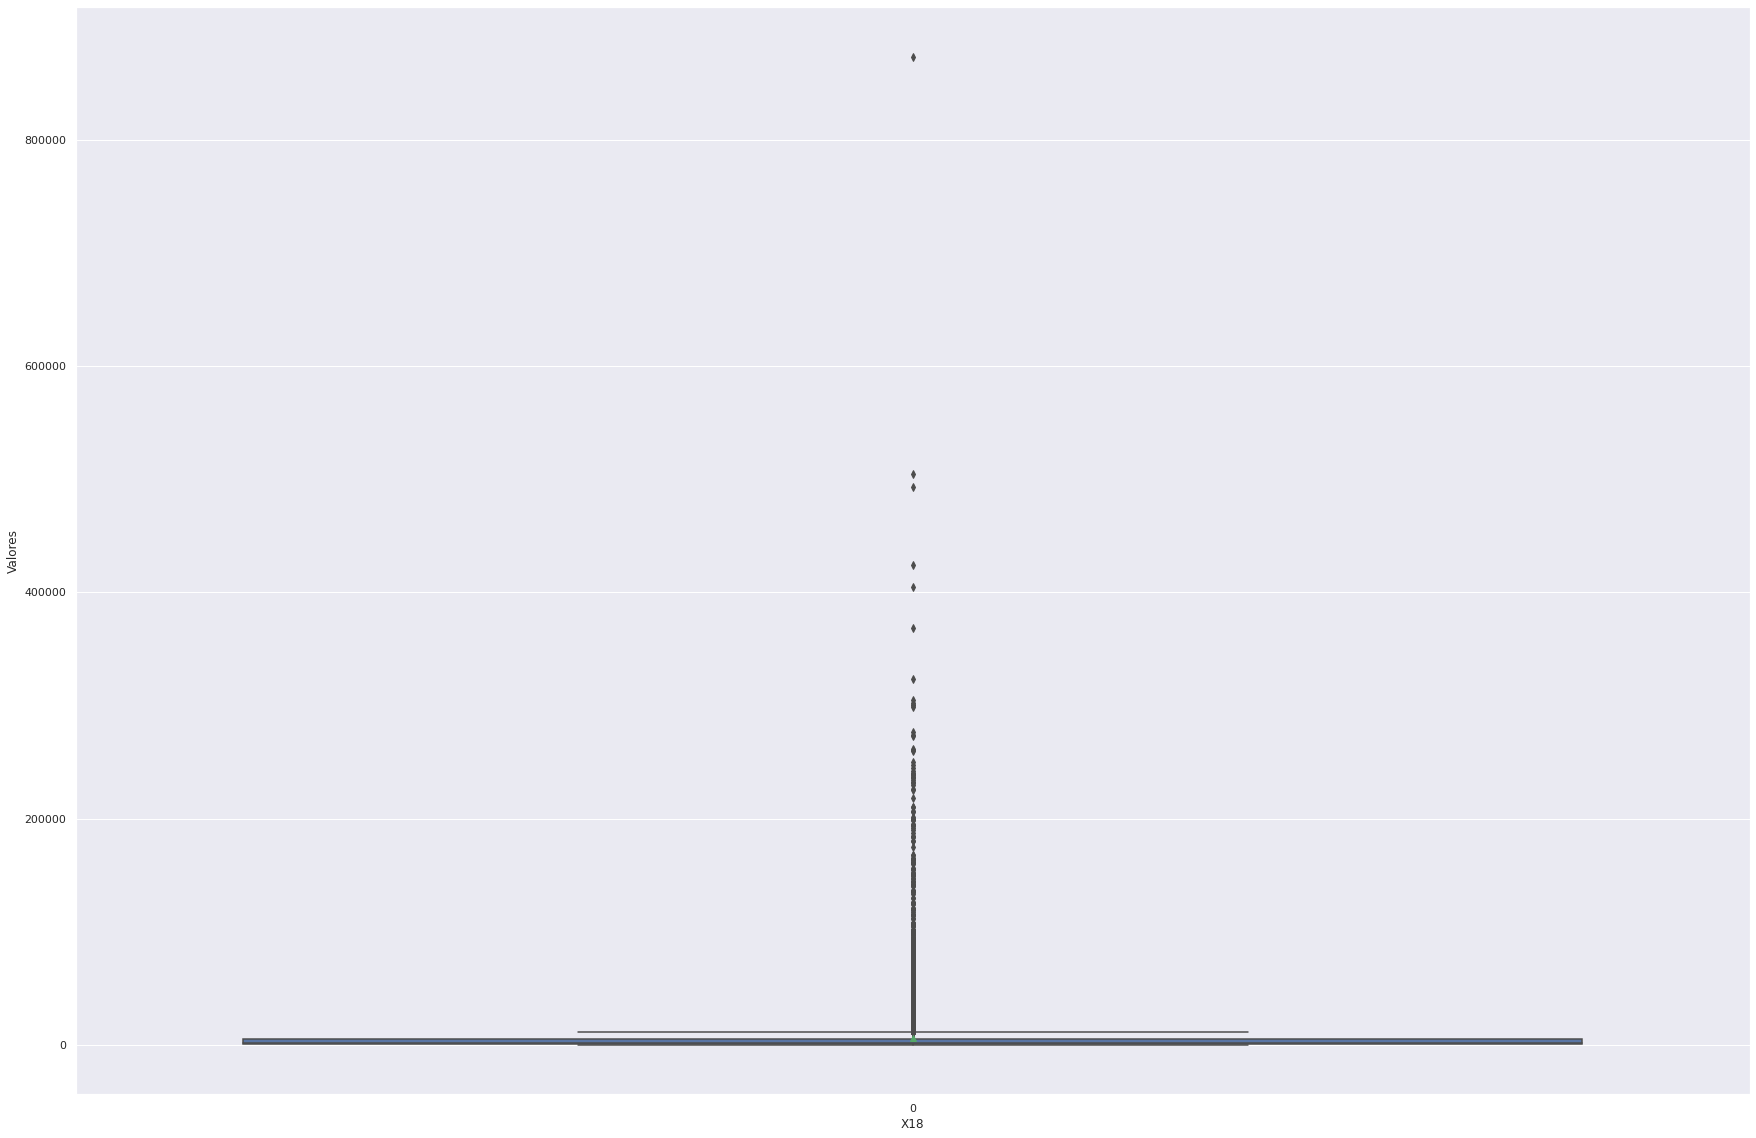

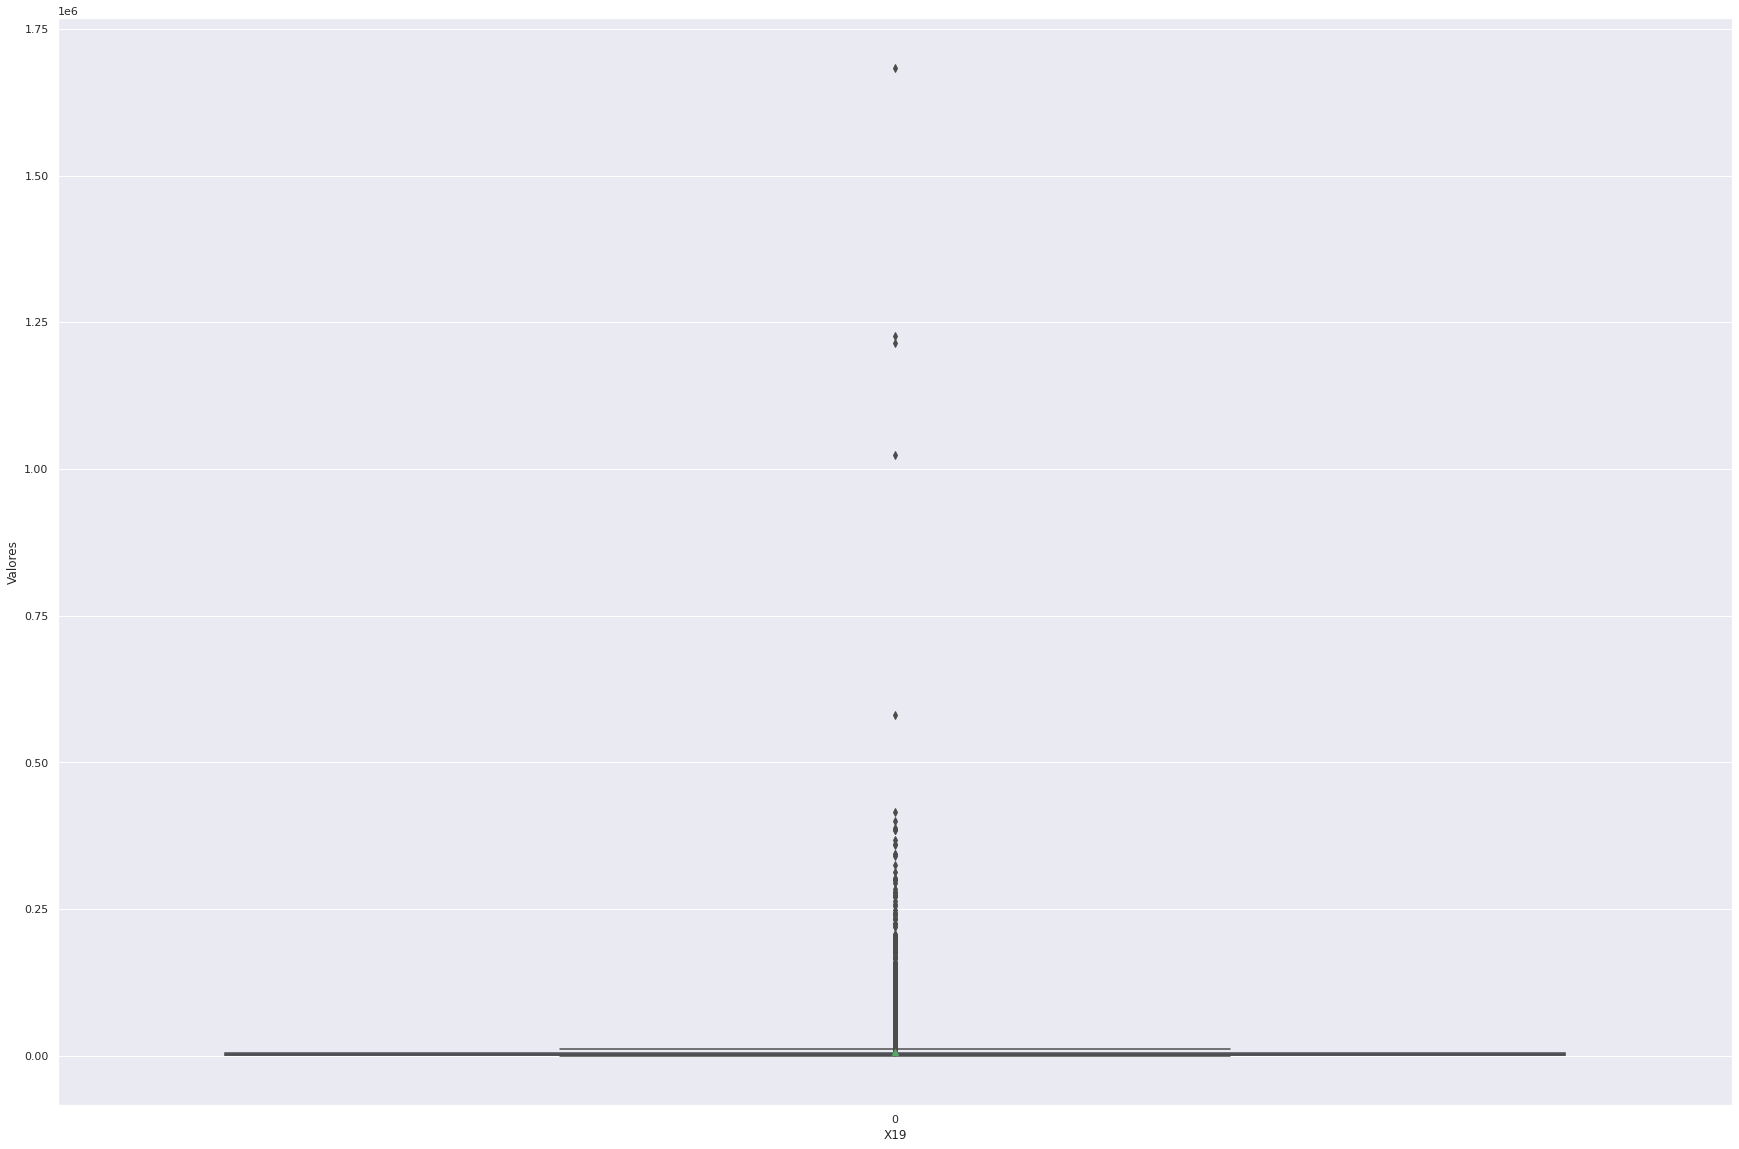

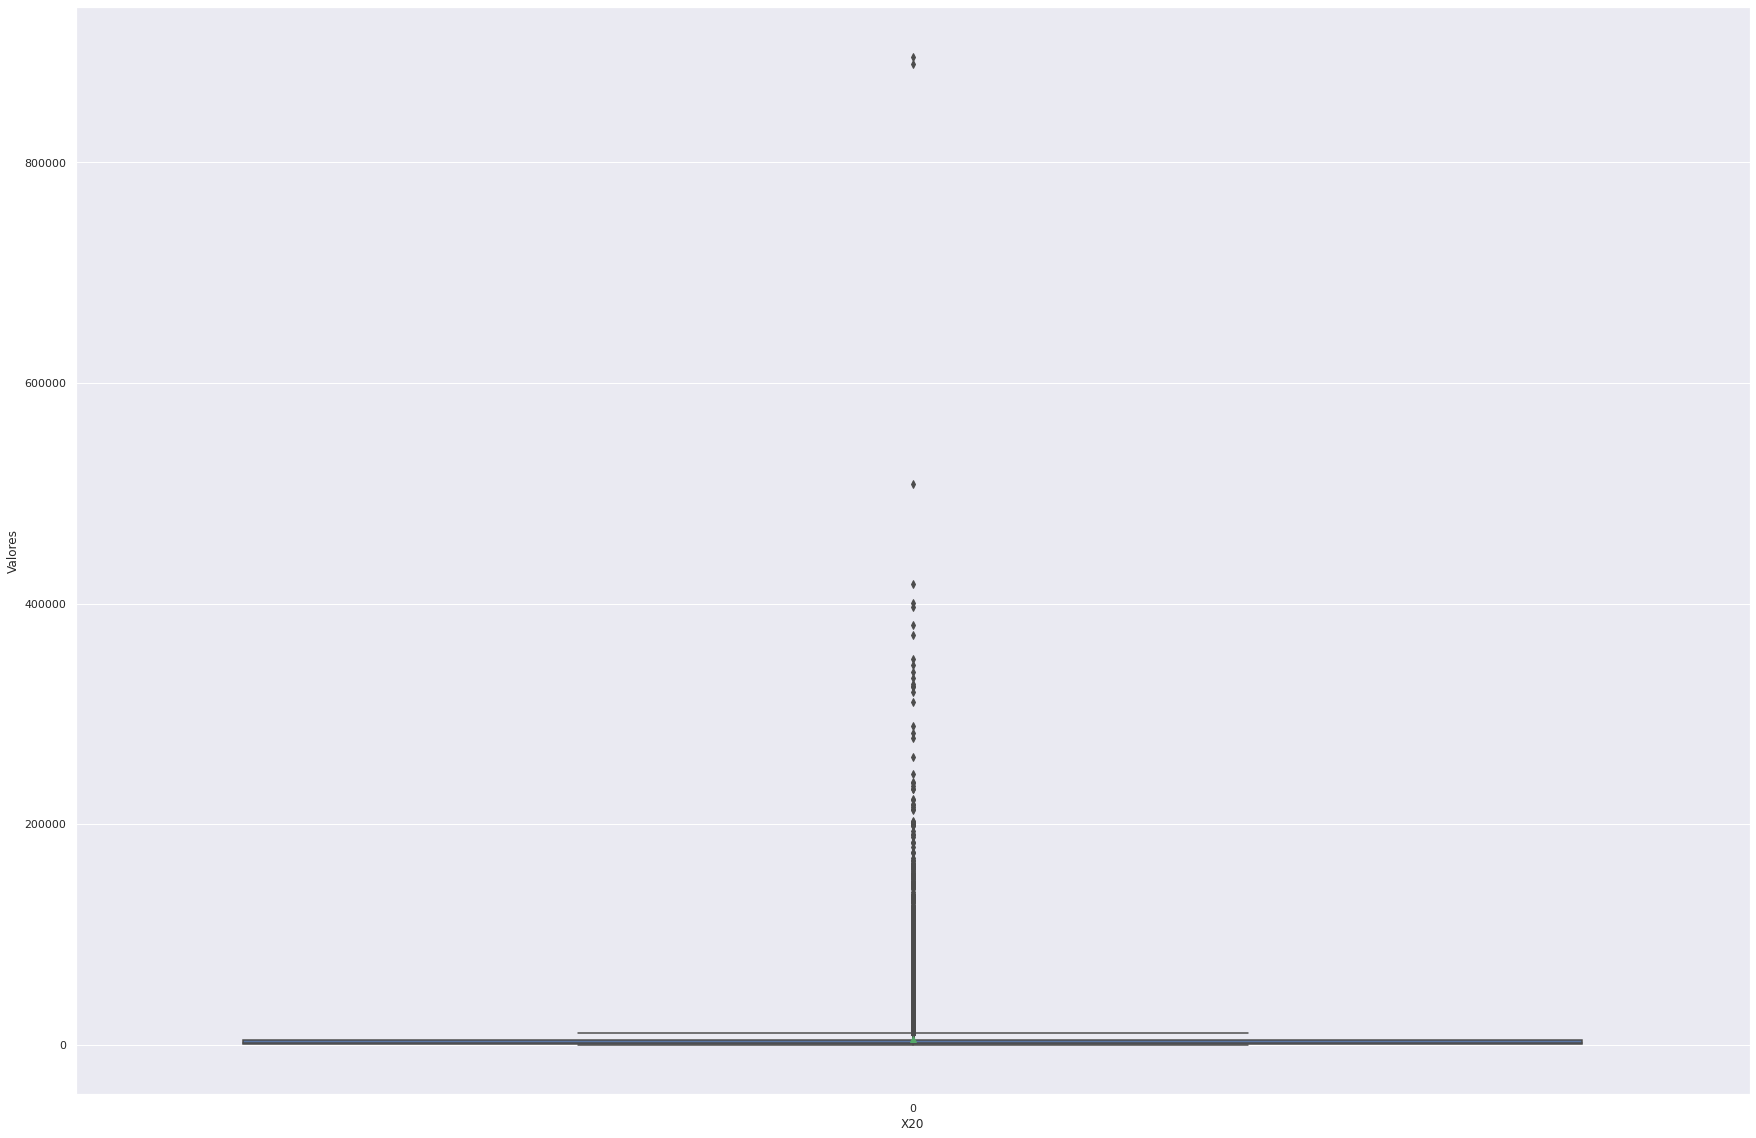

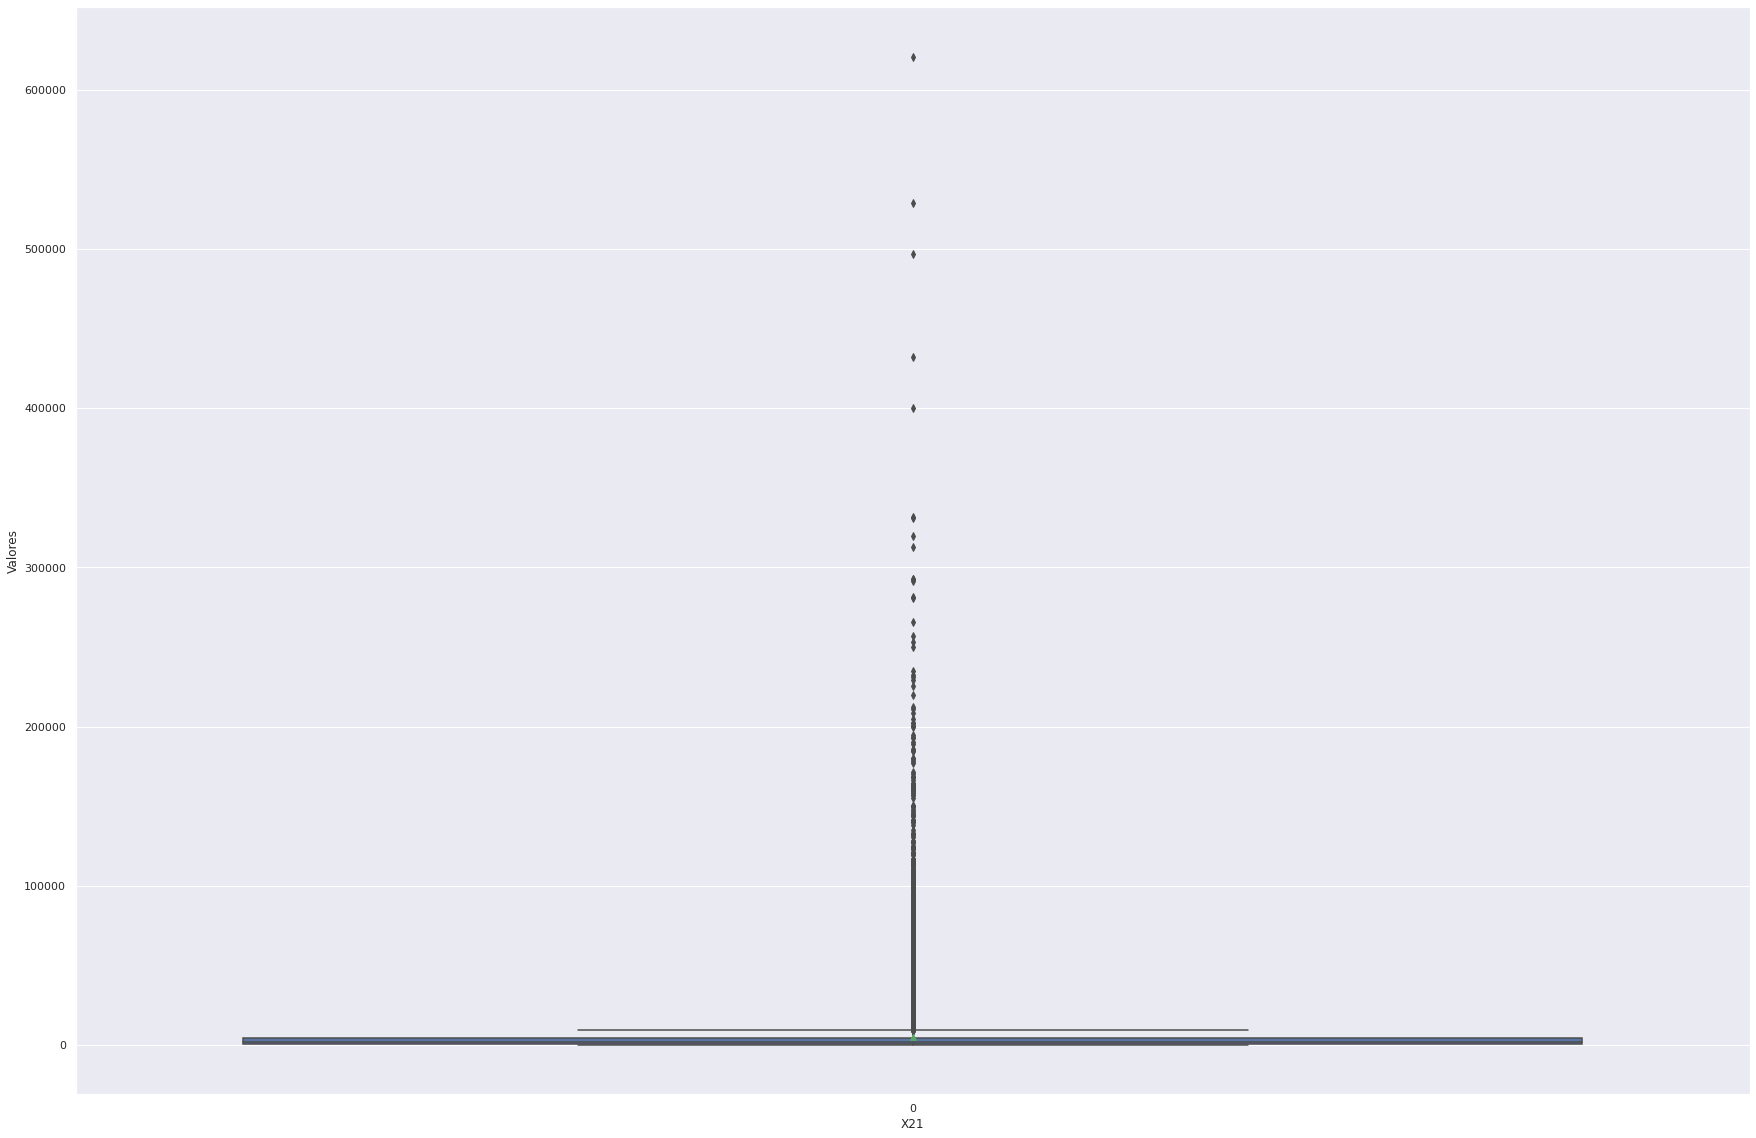

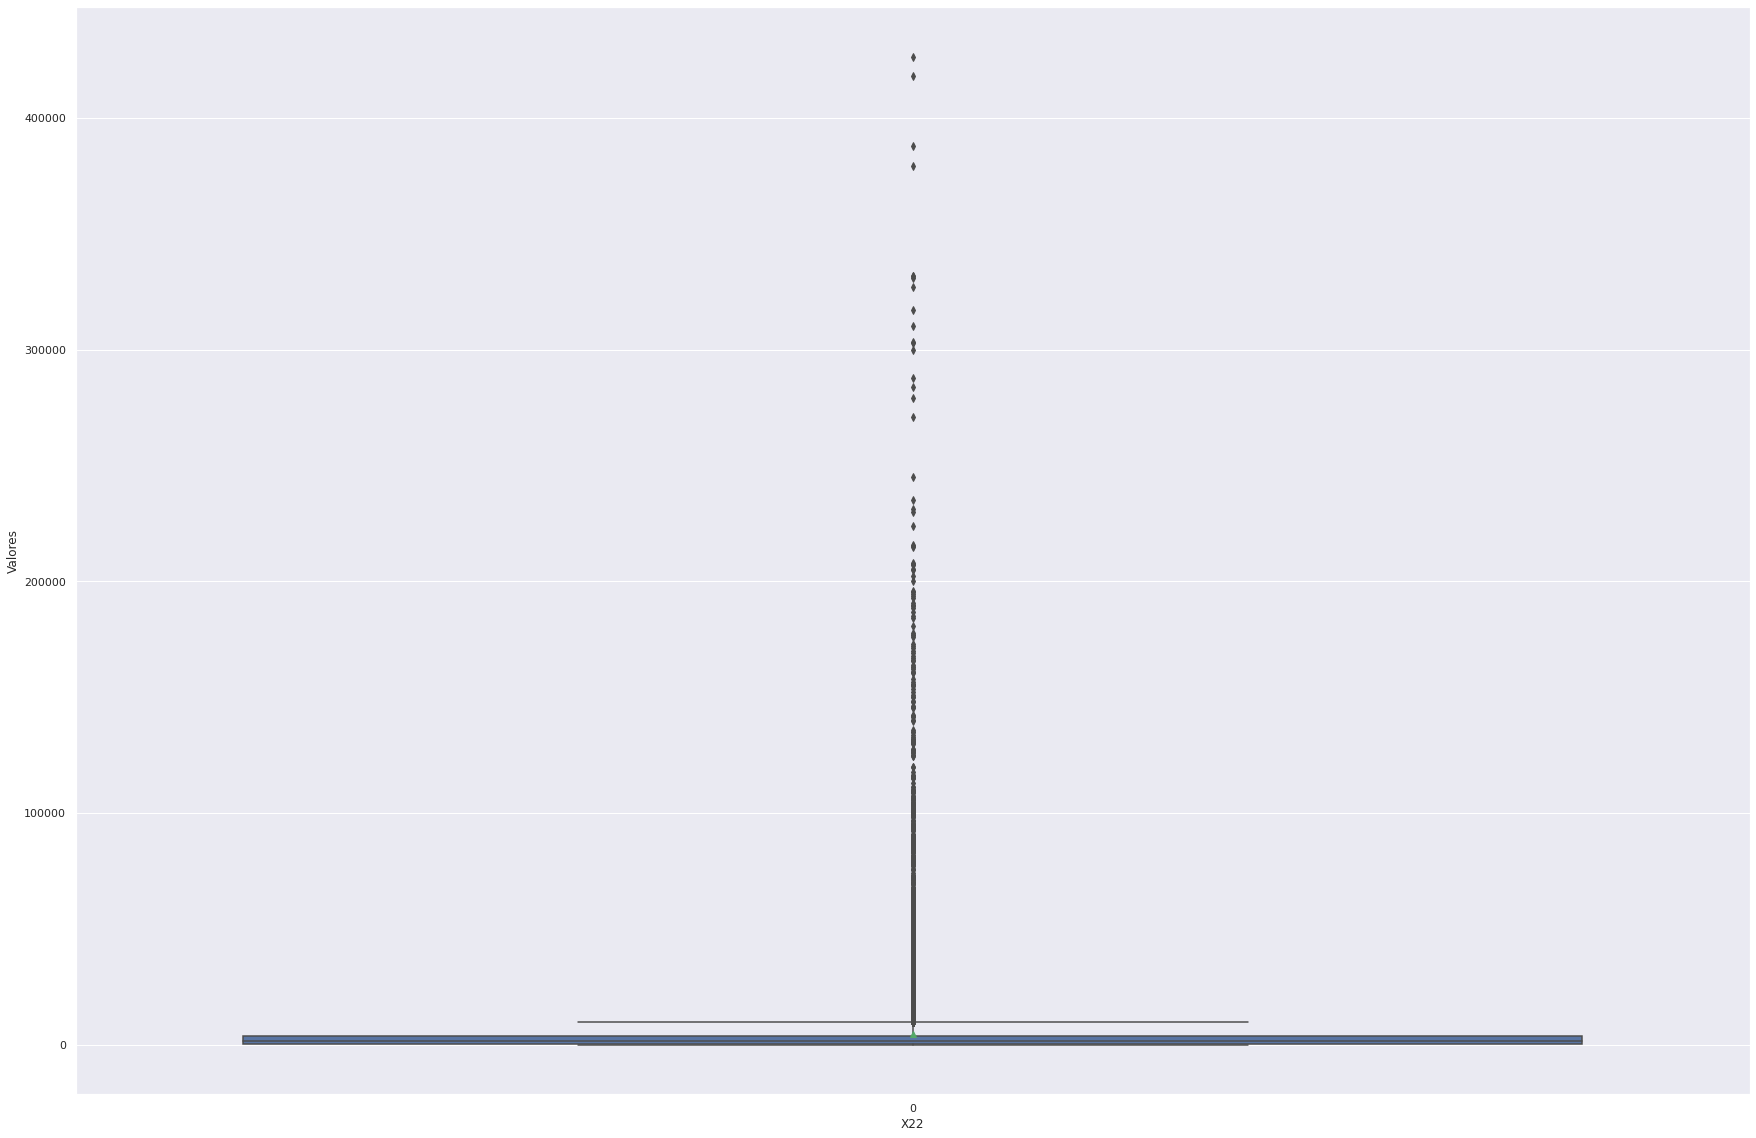

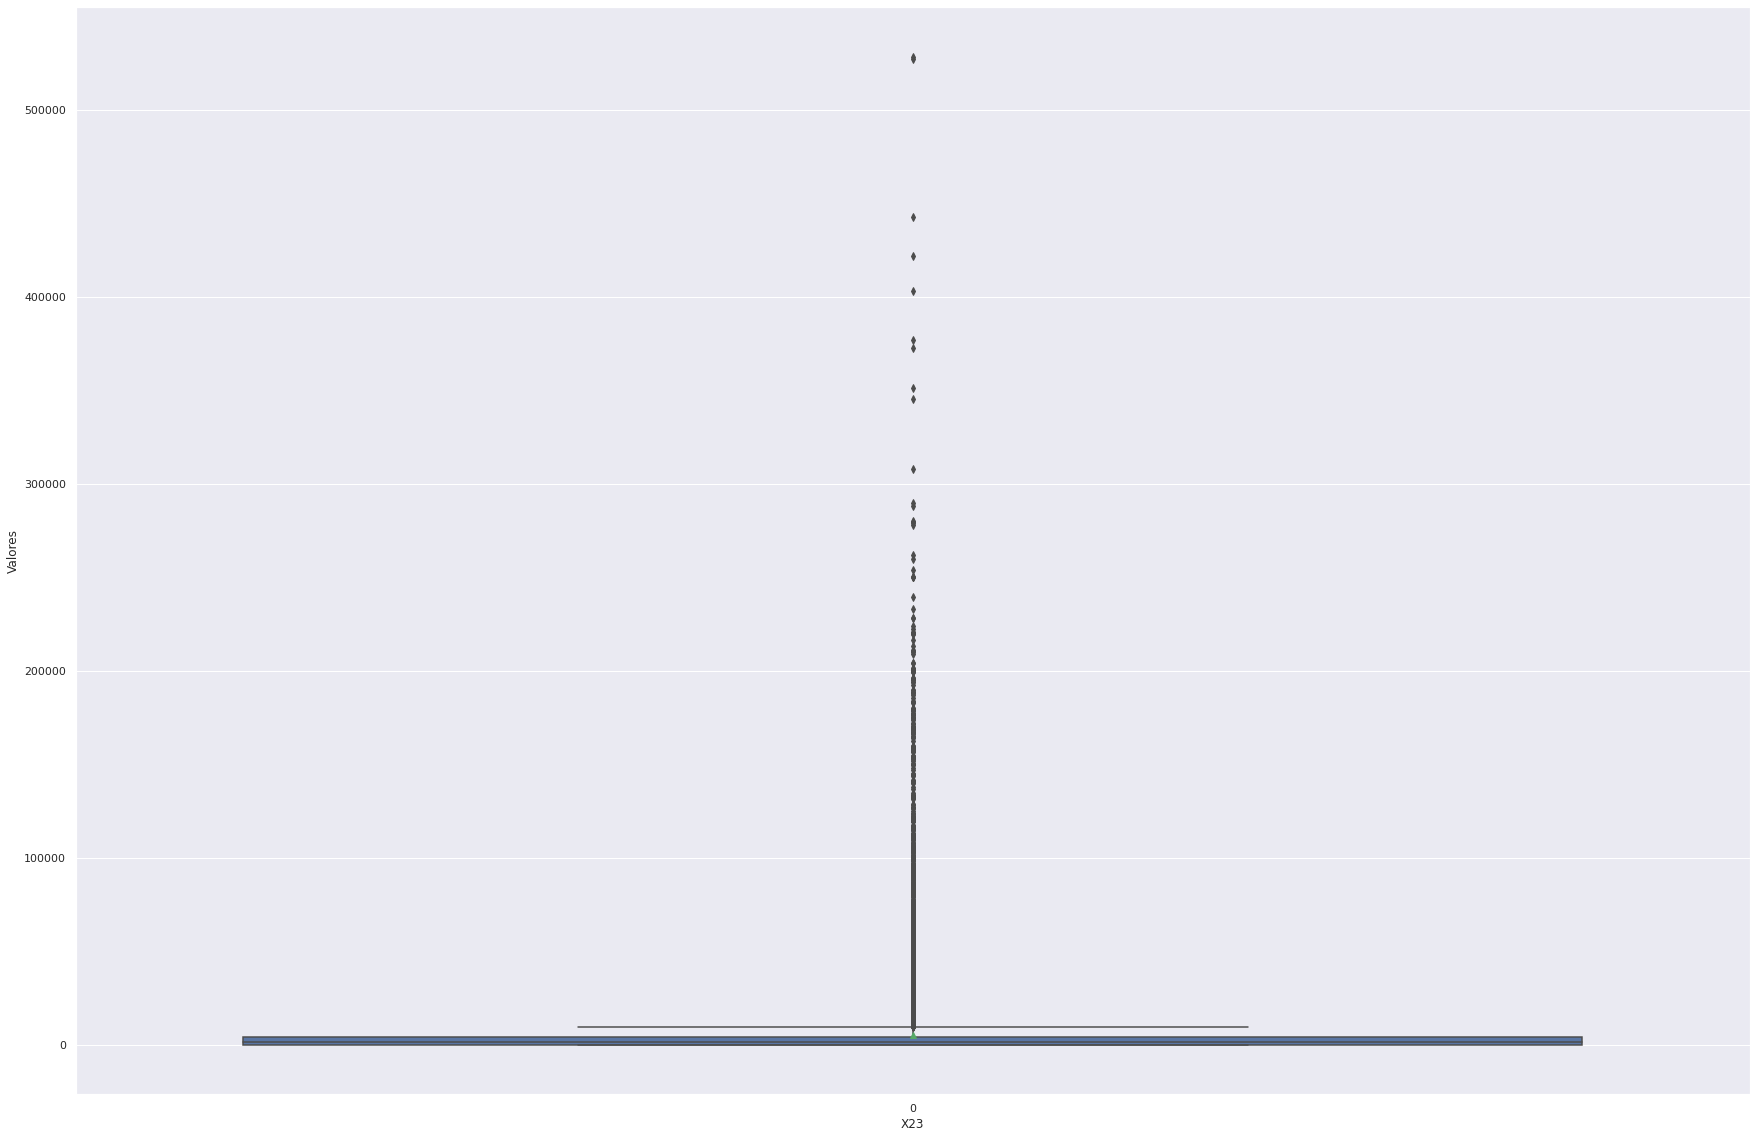

In [272]:
for i in range(len(X.columns)):
    ax = sns.boxplot(data=X.iloc[:,i],showmeans=True)
    ax.set(xlabel=X.columns[i], ylabel='Valores')
    plt.show()


**Parte 2**

 **1. ¿Cuál es el número de componentes mínimo y por qué?**

De acuerdo a lo investigado a través de los recursos a disposición, el material de consulta y bibliografía no se establece un número determinado de componentes mínimos para concluir un análisis, se deja más bien a libre determinación por parte de los analistas según el caso para que determinen cuantos PCA's son eficientes y suficientes.

En nuestro caso decidimos explicar la variabilidad de almenos el 95% de los datos por lo que se nos ajustaron los primeros 5 componentes para lograr este objetivo. PC1 a PC5 ya que estos contribuyen con un 95.40 % de la varianza total asociada con las variables originales.

**2. ¿Cuál es la variación de los datos que representan esos componentes?**


En el siguiente enciso se muestra cuanta variación de datos que representa cada componente.

In [273]:
# Por porcentaje de varianza por componente del modelo de PCA

per_var = np.round(pca.explained_variance_ratio_*100, decimals=4)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels, per_var)))

PC1 : % 41.4079
PC2 : % 31.9508
PC3 : % 18.2693
PC4 : % 2.0501
PC5 : % 1.7219
PC6 : % 1.5453
PC7 : % 0.9319
PC8 : % 0.6674
PC9 : % 0.5331
PC10 : % 0.3692
PC11 : % 0.218
PC12 : % 0.1649
PC13 : % 0.1125
PC14 : % 0.0576


**3. ¿Cuál es la pérdida de información después de realizar PCA?**

Dado el criterio que establecimos al determinar un 95% de variabilidad de la información a ser explicada por los componentes, tenemos que la diferencia a un 100% sería la perdida asumida de información.

Más exactamente 100% - 95,40% = 4,6% de información será desechada. 

Esto con el objetivo de simplificar el numero de variables de analisis ya que estas implican complejidad y mayores recursos.


**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

- X12 Es la variable original que representa un mayor peso dentro de los componentes seleccionados, con un coeficiente de 0.742.

- X23 Es la variable original que dentro de los componentes seleccionados representa un menor peso, con un coeficiente de 0.7044

**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

PCA se recomienda cuando tiene muchas variables y necesita reducir la dimensionalidad del modelo. Dadas las ventajas del aprendizaje automático, PCA permite la reducción de variables redundantes o idénticamente informativas.

El uso del análisis de componentes principales puede proporcionar una interpretación profunda de los datos porque puede preservar patrones, tendencias de todas las dimensiones o variables.